<a href="https://colab.research.google.com/github/gopalaniyengar/DS203-Project/blob/main/19D170009_19D170029.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DS203 Course Project

#<Big> <strong>A Study of Global Economic Freedom and Well Being</strong>




In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
pd.set_option('display.max_columns', None)

from google.colab import files

import warnings
warnings.filterwarnings("ignore")

import scipy
from scipy import stats
import statsmodels.api as sm

In [ ]:
#uploaded = files.upload()

In [ ]:
!pwd
!ls

/content
 2015.csv	 2018.csv			       hfi_cc_2018.csv
 2016.csv	 2019.csv			       hfi_cc_2019.csv
 2017.csv	 economic_freedom_index2019_data.csv   sample_data
'2018 (1).csv'	 efw_cc.csv


## Economic Freedom Index 2019
###economic_freedom_index2019_data.csv
###**df, top20_list**

###Cleaning the Data

In [ ]:
import io

# data on Economic Freedom Index
df = pd.read_csv('/content/economic_freedom_index2019_data.csv', encoding = "ISO-8859-1")
display(df) #original data

CountryID Country Name      WEBNAME                        Region  \
0            1  Afghanistan  Afghanistan                  Asia-Pacific   
1            2      Albania      Albania                        Europe   
2            3      Algeria      Algeria  Middle East and North Africa   
3            4       Angola       Angola            Sub-Saharan Africa   
4            5    Argentina    Argentina                      Americas   
..         ...          ...          ...                           ...   
181        179    Venezuela    Venezuela                      Americas   
182        180      Vietnam      Vietnam                  Asia-Pacific   
183        181        Yemen        Yemen  Middle East and North Africa   
184        182       Zambia       Zambia            Sub-Saharan Africa   
185        183     Zimbabwe     Zimbabwe            Sub-Saharan Africa   

     World Rank  Region Rank  2019 Score  Property Rights  \
0         152.0         39.0        51.5             19.6   
1          52.0         27.0        66.5             54.8   
2         171.0         14.0        46.2             31.6   
3         156.0         33.0        50.6             35.9   
4         148.0         26.0        52.2             47.8   
..          ...          ...         ...              ...   
181       179.0         32.0        25.9              7.6   
182       128.0         30.0        55.3             49.8   
183         NaN          NaN         NaN             19.6   
184       138.0         27.0        53.6             45.0   
185       175.0         45.0        40.4             29.7   

     Judical Effectiveness  Government Integrity  Tax Burden  Gov't Spending  \
0                     29.6                  25.2        91.7            80.3   
1                     30.6                  40.4        86.3            73.9   
2                     36.2                  28.9        76.4            48.7   
3                     26.6                  20.5        83.9            80.7   
4                     44.5                  33.5        69.3            49.5   
..                     ...                   ...         ...             ...   
181                   13.1                   7.9        74.7            58.1   
182                   40.3                  34.0        79.7            74.1   
183                   22.2                  20.3         NaN            83.7   
184                   35.6                  32.3        72.3            80.1   
185                   24.8                  15.8        62.3            74.5   

     Fiscal Health  Business Freedom  Labor Freedom  Monetary Freedom  \
0             99.3              49.2           60.4              76.7   
1             80.6              69.3           52.7              81.5   
2             18.7              61.6           49.9              74.9   
3             58.2              55.7           58.8              55.4   
4             33.0              56.4           46.9              60.2   
..             ...               ...            ...               ...   
181           17.6              33.9           28.0               0.0   
182           40.7              63.5           62.8              68.9   
183            0.0              45.1           49.8              61.5   
184           12.3              71.1           46.0              70.3   
185           23.7              33.4           43.3              72.4   

     Trade Freedom  Investment Freedom   Financial Freedom  Tariff Rate (%)  \
0             66.0                 10.0               10.0              7.0   
1             87.8                 70.0               70.0              1.1   
2             67.4                 30.0               30.0              8.8   
3             61.2                 30.0               40.0              9.4   
4             70.0                 55.0               60.0              7.5   
..             ...                  ...                ...             

In [ ]:
df.dtypes

CountryID                        int64
Country Name                    object
WEBNAME                         object
Region                          object
World Rank                     float64
Region Rank                    float64
2019 Score                     float64
Property Rights                float64
Judical Effectiveness          float64
Government Integrity           float64
Tax Burden                     float64
Gov't Spending                 float64
Fiscal Health                  float64
Business Freedom               float64
Labor Freedom                  float64
Monetary Freedom               float64
Trade Freedom                  float64
Investment Freedom             float64
Financial Freedom              float64
Tariff Rate (%)                float64
Income Tax Rate (%)            float64
Corporate Tax Rate (%)         float64
Tax Burden % of GDP            float64
Gov't Expenditure % of GDP     float64
Country                         object
Population (Millions)    

In [ ]:
#drop rows having missing data
df = df.dropna(axis = 0, how = 'any')

# convert all string variables having numerical information to float or int
#eliminate unwanted symbols like $ and comma in GDP values
for col in ["Population (Millions)","GDP (Billions, PPP)", "GDP per Capita (PPP)","Unemployment (%)","FDI Inflow (Millions)"]:
  df[col] = [float(x.replace("$", "").replace(",", "")) for x in df[col]]

In [ ]:
#drop unwanted columns like Country (since Country Name is already present), CountryID, WEBNAME
df = df.drop(columns = ["Country", "WEBNAME", "CountryID"])

#Convert World Ranks to int
df["World Rank"] = [int(x) for x in df["World Rank"]]
df["Region Rank"] = [int(x) for x in df["Region Rank"]]

# sort the datframe by the Score (Rank)
df = df.sort_values(by = "2019 Score", ascending= False, ignore_index= True)
dfplot=df.sort_values(by = ["Region","2019 Score"], ascending= False, ignore_index= True)
display(df)
display(dfplot)

Country Name              Region  World Rank  Region Rank  \
0             Hong Kong        Asia-Pacific           1            1   
1             Singapore        Asia-Pacific           2            2   
2           New Zealand        Asia-Pacific           3            3   
3           Switzerland              Europe           4            1   
4             Australia        Asia-Pacific           5            4   
..                  ...                 ...         ...          ...   
168   Equatorial Guinea  Sub-Saharan Africa         174           44   
169            Zimbabwe  Sub-Saharan Africa         175           45   
170  Congo, Republic of  Sub-Saharan Africa         176           46   
171             Eritrea  Sub-Saharan Africa         177           47   
172           Venezuela            Americas         179           32   

     2019 Score  Property Rights  Judical Effectiveness  Government Integrity  \
0          90.2             93.3                   75.3                  83.8   
1          89.4             97.4                   92.4                  95.1   
2          84.4             95.0                   83.5                  96.7   
3          81.9             85.3                   82.0                  88.0   
4          80.9             79.1                   86.5                  79.9   
..          ...              ...                    ...                   ...   
168        41.0             29.7                   18.1                  15.8   
169        40.4             29.7                   24.8                  15.8   
170        39.7             33.2                   29.6                  25.3   
171        38.9             35.5                   18.1                  19.7   
172        25.9              7.6                   13.1                   7.9   

     Tax Burden  Gov't Spending  Fiscal Health  Business Freedom  \
0          93.1            90.3          100.0              96.4   
1          90.4            90.7           80.0              90.8   
2          71.0            50.4           98.6              91.0   
3          70.5            64.8           96.3              75.4   
4          62.8            60.1           86.2              88.3   
..          ...             ...            ...               ...   
168        71.3            67.6           16.4              37.6   
169        62.3            74.5           23.7              33.4   
170        59.5            40.6            0.0              38.2   
171        81.4            73.9            0.0              17.7   
172        74.7            58.1           17.6              33.9   

     Labor Freedom  Monetary Freedom  Trade Freedom  Investment Freedom   \
0             89.2              86.4           95.0                 90.0   
1             91.0              85.3           94.8                 85.0   
2             86.7              87.5           92.4                 80.0   
3             72.5              85.2           87.4                 85.0   
4             84.1              86.6           87.6                 80.0   
..             ...               ...            ...                  ...   
168           32.7              83.7           48.8                 40.0   
169           43.3              72.4           70.0                 25.0   
170           35.8              82.6           56.8                 45.0   
171           70.0              61.0           69.2                  0.0   
172           28.0               0.0           60.0                  0.0   

     Financial Freedom  Tariff Rate (%)  Income Tax Rate (%)  \
0                 90.0              0.0                 15.0   
1                 80.0              0.1                 22.0   
2                 80.0              1.3                 33.0   
3                 90.0              1.3                 40.0   
4                 90.0              1.2                 45.0   
..                 ...              ...                  ..

Country Name              Region  World Rank  Region Rank  2019 Score  \
0        Mauritius  Sub-Saharan Africa          25            1        73.0   
1           Rwanda  Sub-Saharan Africa          32            2        71.1   
2         Botswana  Sub-Saharan Africa          36            3        69.5   
3       Cabo Verde  Sub-Saharan Africa          73            4        63.1   
4    Côte d'Ivoire  Sub-Saharan Africa          78            5        62.4   
..             ...                 ...         ...          ...         ...   
168         Brazil            Americas         150           27        51.9   
169       Suriname            Americas         165           28        48.1   
170        Ecuador            Americas         170           29        46.9   
171        Bolivia            Americas         173           30        42.3   
172      Venezuela            Americas         179           32        25.9   

     Property Rights  Judical Effectiveness  Government Integrity  Tax Burden  \
0               69.5                   62.1                  40.3        92.1   
1               72.2                   83.2                  67.9        79.8   
2               58.1                   45.7                  52.4        82.7   
3               44.1                   49.0                  43.7        76.4   
4               40.9                   47.8                  38.1        77.5   
..               ...                    ...                   ...         ...   
168             57.3                   51.7                  28.1        70.5   
169             49.1                   22.2                  35.5        70.9   
170             35.9                   20.2                  25.3        77.0   
171             20.5                   12.3                  19.7        82.4   
172              7.6                   13.1                   7.9        74.7   

     Gov't Spending  Fiscal Health  Business Freedom  Labor Freedom  \
0              80.3           73.6              79.8           60.8   
1              79.4           86.3              56.2           82.2   
2              65.9           94.6              68.7           68.2   
3              71.2           59.7              65.2           55.7   
4              83.9           74.3              61.0           52.5   
..              ...            ...               ...            ...   
168            55.2            5.9              57.9           51.9   
169            77.2            9.6              48.3           73.5   
170            55.5           32.1              54.1           48.2   
171            49.3           17.6              58.8           52.9   
172            58.1           17.6              33.9           28.0   

     Monetary Freedom  Trade Freedom  Investment Freedom   Financial Freedom  \
0                79.4           88.4                 80.0               70.0   
1                76.1           70.4                 60.0               40.0   
2                78.8           83.8                 65.0               70.0   
3                84.1           68.2                 80.0               60.0   
4                74.2           73.6                 75.0               50.0   
..                ...            ...                  ...                ...   
168              75.5           69.0                 50.0               50.0   
169              56.0           64.6                 40.0               30.0   
170              73.5           66.4                 35.0               40.0   
171              68.8           70.4                 15.0               40.0   
172               0.0           60.0                  0.0               10.0   

     Tariff Rate (%)  Income Tax Rate (%)  Corporate Tax Rate (%)  \
0                0.8                 15.0                    15.0   
1                7.3                 30.0                    30.0   
2                0.6                 25.0                    22

###EDA

In [ ]:
display(df.describe())

World Rank  Region Rank  2019 Score  Property Rights  \
count  173.000000   173.000000  173.000000       173.000000   
mean    89.046243    20.219653   61.349133        53.561850   
std     51.636567    12.623265   10.290731        19.229243   
min      1.000000     1.000000   25.900000         7.600000   
25%     44.000000     9.000000   54.600000        37.400000   
50%     90.000000    19.000000   60.800000        52.400000   
75%    133.000000    30.000000   68.100000        66.000000   
max    179.000000    47.000000   90.200000        97.400000   

       Judical Effectiveness  Government Integrity  Tax Burden  \
count             173.000000            173.000000  173.000000   
mean               46.045087             42.284393   77.704046   
std                17.651070             19.925058   11.786874   
min                12.300000              7.900000   42.000000   
25%                32.300000             28.100000   71.000000   
50%                44.000000             36.400000   78.600000   
75%                56.000000             50.500000   85.400000   
max                92.400000             96.700000   99.800000   

       Gov't Spending  Fiscal Health  Business Freedom  Labor Freedom  \
count      173.000000     173.000000        173.000000     173.000000   
mean        66.019075      66.811561         64.722543      60.051445   
std         20.957233      30.813333         14.770800      13.778284   
min          0.900000       0.000000         17.700000      20.000000   
25%         54.100000      42.500000         55.800000      51.100000   
50%         70.000000      80.300000         65.800000      60.100000   
75%         83.300000      90.100000         75.200000      69.200000   
max         96.600000     100.000000         96.400000      91.000000   

       Monetary Freedom  Trade Freedom  Investment Freedom   \
count        173.000000     173.000000           173.000000   
mean          75.682659      75.022543            58.583815   
std            9.501612      10.825901            21.408001   
min            0.000000      45.000000             0.000000   
25%           72.400000      67.400000            45.000000   
50%           77.800000      76.600000            60.000000   
75%           81.800000      84.700000            75.000000   
max           88.000000      95.000000            95.000000   

       Financial Freedom  Tariff Rate (%)  Income Tax Rate (%)  \
count         173.000000       173.000000           173.000000   
mean           49.653179         5.623699            28.604046   
std            18.921378         4.408220            13.235103   
min            10.000000         0.000000             0.000000   
25%            40.000000         2.000000            20.000000   
50%            50.000000         4.200000            30.000000   
75%            60.000000         8.700000            35.000000   
max            90.000000        18.600000            60.000000   

       Corporate Tax Rate (%)  Tax Burden % of GDP  \
count              173.000000           173.000000   
mean                23.916763            22.045665   
std                  8.878332            10.151558   
min                  0.000000             1.600000   
25%                 20.000000            14.000000   
50%                 25.000000            20.700000   
75%                 30.000000            29.500000   
max                 50.000000            47.000000   

       Gov't Expenditure % of GDP   Population (Millions)  \
count                   173.000000             173.000000   
mean                     32.023121              42.091908   
std                      10.387187             149.902308   
min                      10.600000               0.100000   
25%                      23.600000               2.800000   
50%                      31.600000               8.800000   
75%                      39.100000              31.400000   
max                      57.500000            13

The average score in 2019 was 61.35 and the standard deviation was 10.29. Now we can plot some graphs to understand which countries are scoring how much with respect to these.

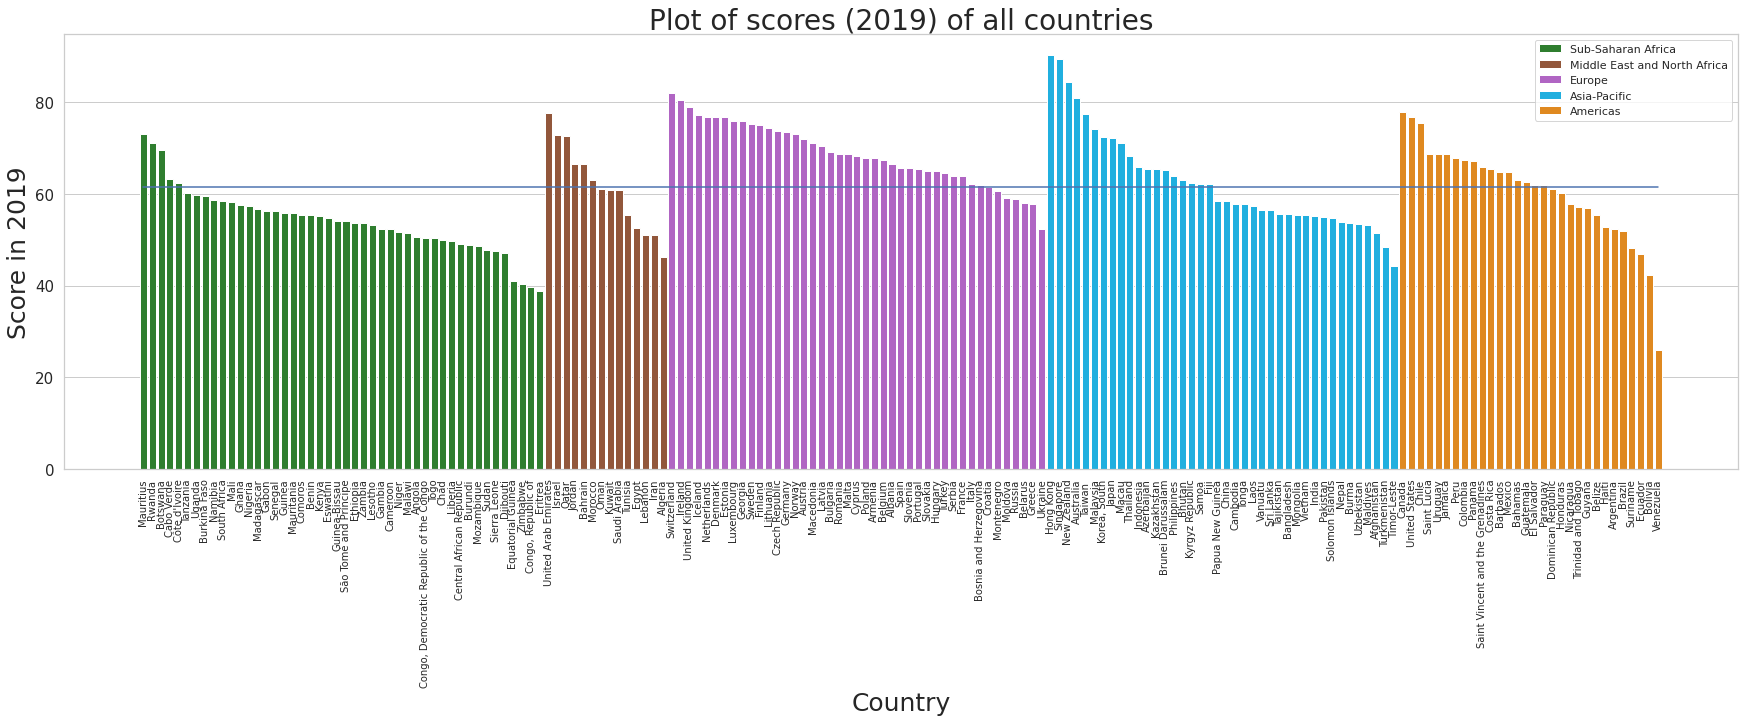

In [ ]:
plt.figure(figsize = (30,8))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=dfplot["Country Name"], y=dfplot["2019 Score"], hue = dfplot["Region"], palette=["forestgreen","sienna","mediumorchid", "deepskyblue", "darkorange"], dodge = False)
sns.lineplot(x=dfplot["Country Name"], y=dfplot["2019 Score"].mean())
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 15)
plt.xlabel("Country", fontsize =  25)
plt.ylabel("Score in 2019", fontsize = 25)
plt.title("Plot of scores (2019) of all countries", fontsize = 28);

This plot shows us that a lot of European countries have high scores as compared to other regions, while the Sub Saharan African Countries are mostly having low scores. We can also plot the countries' scores regionwise to analyse how much variation is present within each region

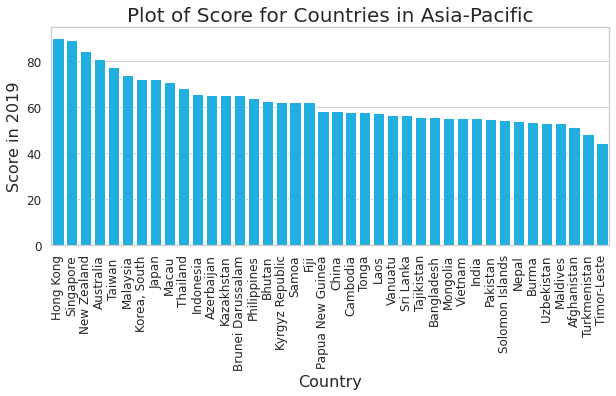

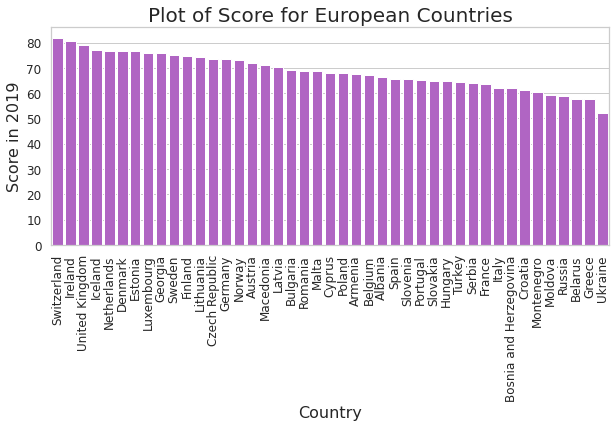

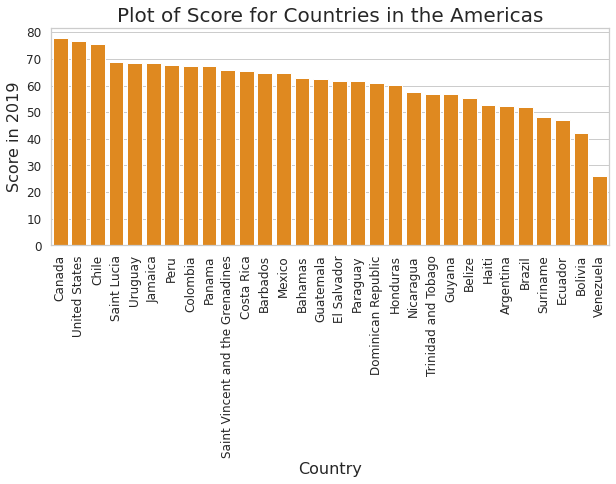

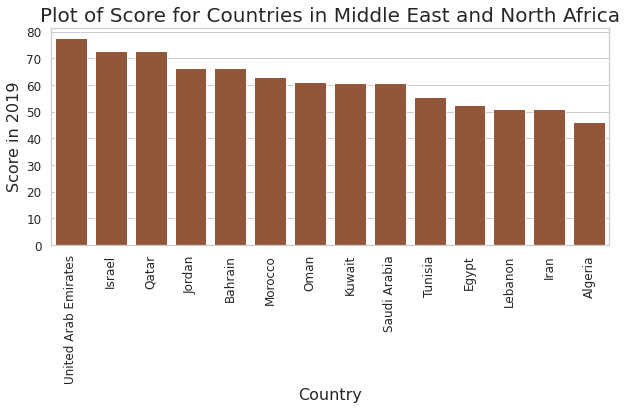

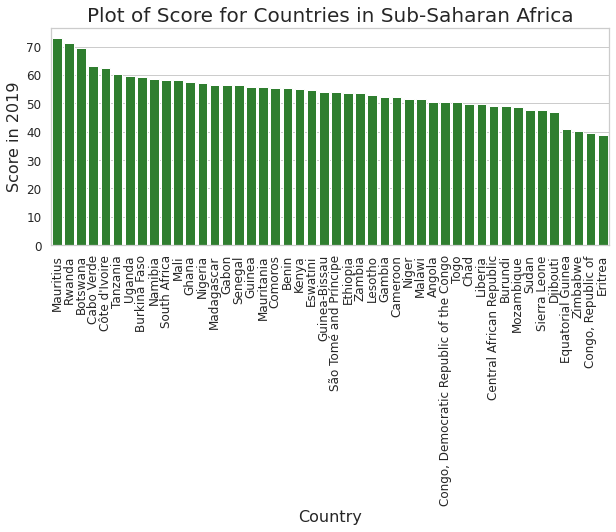

In [ ]:
plt.figure(figsize = (10,4))
sns.barplot(x=df.loc[df["Region"] == "Asia-Pacific"]["Country Name"], y=df.loc[df["Region"] == "Asia-Pacific"]["2019 Score"], color = 'deepskyblue')
# sns.lineplot(x=df.loc[df["Region"] == "Asia-Pacific"]["Country Name"], 
#              y = [df.loc[df["Region"] == "Asia-Pacific"]["2019 Score"].mean()]*len(df.loc[df["Region"] == "Asia-Pacific"]), 
#              color = "red", dashes = True)
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Country", fontsize = 16)
plt.ylabel("Score in 2019", fontsize = 16)
plt.title("Plot of Score for Countries in Asia-Pacific", fontsize = 20)
plt.show();


plt.figure(figsize = (10,4))
sns.barplot(x=df.loc[df["Region"] == "Europe"]["Country Name"], y=df.loc[df["Region"] == "Europe"]["2019 Score"], color = 'mediumorchid')
# sns.lineplot(x=df.loc[df["Region"] == "Europe"]["Country Name"], 
#              y = [df.loc[df["Region"] == "Europe"]["2019 Score"].mean()]*len(df.loc[df["Region"] == "Europe"]), 
#              color = "red", dashes = True)
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Country", fontsize = 16)
plt.ylabel("Score in 2019", fontsize = 16)
plt.title("Plot of Score for European Countries", fontsize = 20)
plt.show();

plt.figure(figsize = (10,4))
sns.barplot(x=df.loc[df["Region"] == "Americas"]["Country Name"], y=df.loc[df["Region"] == "Americas"]["2019 Score"], color = 'darkorange')
# sns.lineplot(x=df.loc[df["Region"] == "Americas"]["Country Name"], 
#              y = [df.loc[df["Region"] == "Americas"]["2019 Score"].mean()]*len(df.loc[df["Region"] == "Americas"]), 
#              color = "red", dashes = True)
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Country", fontsize = 16)
plt.ylabel("Score in 2019", fontsize = 16)
plt.title("Plot of Score for Countries in the Americas", fontsize = 20)
plt.show();

plt.figure(figsize = (10,4))
sns.barplot(x=df.loc[df["Region"] == "Middle East and North Africa"]["Country Name"], y=df.loc[df["Region"] == "Middle East and North Africa"]["2019 Score"], color = 'sienna')
# sns.lineplot(x=df.loc[df["Region"] == "Middle East and North Africa"]["Country Name"], 
#              y = [df.loc[df["Region"] == "Middle East and North Africa"]["2019 Score"].mean()]*len(df.loc[df["Region"] == "Middle East and North Africa"]), 
#              color = "red", dashes = True)
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Country", fontsize = 16)
plt.ylabel("Score in 2019", fontsize = 16)
plt.title("Plot of Score for Countries in Middle East and North Africa", fontsize = 20)
plt.show();

plt.figure(figsize = (10,4))
sns.barplot(x=df.loc[df["Region"] == "Sub-Saharan Africa"]["Country Name"], y=df.loc[df["Region"] == "Sub-Saharan Africa"]["2019 Score"], color = 'forestgreen')
# sns.lineplot(x=df.loc[df["Region"] == "Sub-Saharan Africa"]["Country Name"], 
#              y = [df.loc[df["Region"] == "Sub-Saharan Africa"]["2019 Score"].mean()]*len(df.loc[df["Region"] == "Sub-Saharan Africa"]), 
#              color = "red", dashes = True)
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Country", fontsize = 16)
plt.ylabel("Score in 2019", fontsize = 16)
plt.title("Plot of Score for Countries in Sub-Saharan Africa", fontsize = 20)
plt.show();


### Analysing the columns: 

Since we have many columns in our data, it makes sense to analyse which variables have a more significant impact on the score. This impact can be quantified by finding the Pearson Correlation Coefficient of each variable with the variable "2019 Score". A higher magnitude of the coefficient means a stronger (closer to linear) relationship between the two atttributes we analyse, while the sign indicates whether the correlation is positive or negative. As a bonus, we can also find the correlation between every two attributes of our data by plotting a correlation heatmap. 

In [ ]:
import scipy.stats as stats

df_pearsonr = pd.DataFrame(columns = ["Variable", "Pearson Correlation Coefficient", "2 tailed p-value"])
for i, col in enumerate(df.columns.values[2:]):
  df_pearsonr.loc[i] = (col, stats.pearsonr(df["2019 Score"], df[col])[0], stats.pearsonr(df["2019 Score"], df[col])[1])

# df_pearsonr
df_pearsonr.reindex(df_pearsonr["Pearson Correlation Coefficient"].abs().sort_values(ascending = False).index)

Variable  Pearson Correlation Coefficient  \
2                    2019 Score                         1.000000   
0                    World Rank                        -0.970512   
3               Property Rights                         0.876601   
5          Government Integrity                         0.818174   
4         Judical Effectiveness                         0.805825   
14            Financial Freedom                         0.794123   
9              Business Freedom                         0.779681   
13          Investment Freedom                          0.734504   
1                   Region Rank                        -0.728599   
12                Trade Freedom                         0.718299   
24         GDP per Capita (PPP)                         0.649518   
11             Monetary Freedom                         0.589085   
15              Tariff Rate (%)                        -0.570917   
8                 Fiscal Health                         0.559395   
10                Labor Freedom                         0.512976   
18          Tax Burden % of GDP                         0.340777   
17       Corporate Tax Rate (%)                        -0.321238   
27        FDI Inflow (Millions)                         0.292204   
26                Inflation (%)                        -0.289397   
22          GDP Growth Rate (%)                         0.175203   
19  Gov't Expenditure % of GDP                          0.146834   
7                Gov't Spending                        -0.140741   
21          GDP (Billions, PPP)                         0.112114   
25             Unemployment (%)                        -0.094606   
6                    Tax Burden                        -0.075163   
23   5 Year GDP Growth Rate (%)                         0.054537   
28       Public Debt (% of GDP)                        -0.052918   
20        Population (Millions)                        -0.047871   
16          Income Tax Rate (%)                         0.040849   

    2 tailed p-value  
2       0.000000e+00  
0      1.377131e-107  
3       3.323815e-56  
5       5.889867e-43  
4       9.195089e-41  
14      7.965561e-39  
9       1.337966e-36  
13      1.327801e-30  
1       6.558168e-30  
12      9.638844e-29  
24      4.185594e-22  
11      1.527210e-17  
15      2.379998e-16  
8       1.246615e-15  
10      5.359447e-13  
18      4.479269e-06  
17      1.637235e-05  
27      9.580944e-05  
26      1.125585e-04  
22      2.113370e-02  
19      5.388450e-02  
7       6.475617e-02  
21      1.419485e-01  
25      2.156768e-01  
6       3.256894e-01  
23      4.760613e-01  
28      4.892765e-01  
20      5.316839e-01  
16      5.936103e-01

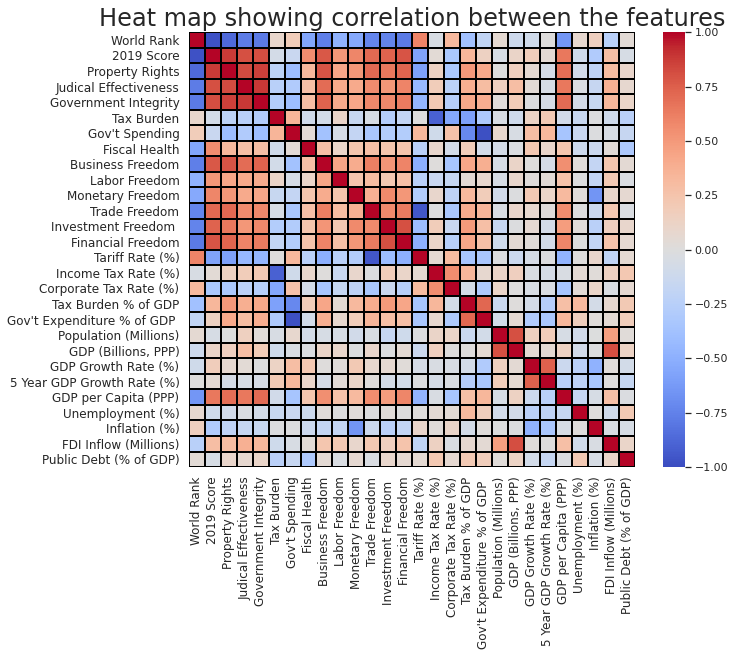

In [ ]:
df_float = df.drop(columns= ["Country Name", "Region", "Region Rank"])

plt.figure(figsize = (10,8))
sns.heatmap(df_float.corr(), vmin = -1, vmax = 1, center= 0, cmap = "coolwarm", linecolor="black", linewidth = 1)
plt.title("Heat map showing correlation between the features", fontsize = 24)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);

The attributes which are significantly impacting the economic freedom score (correlation > 0.75) are Property Rights, Judicial Effectiveness, Government Integrity, Financial Freedom and Business Freedom. We can analyse the variation in 2019 Scores and dependace on these factors through a bubble plot wherein we can also include extra information like the Region and Population, and we can also find a best fit regression line which can serve as a simplified representation of the dependence. 

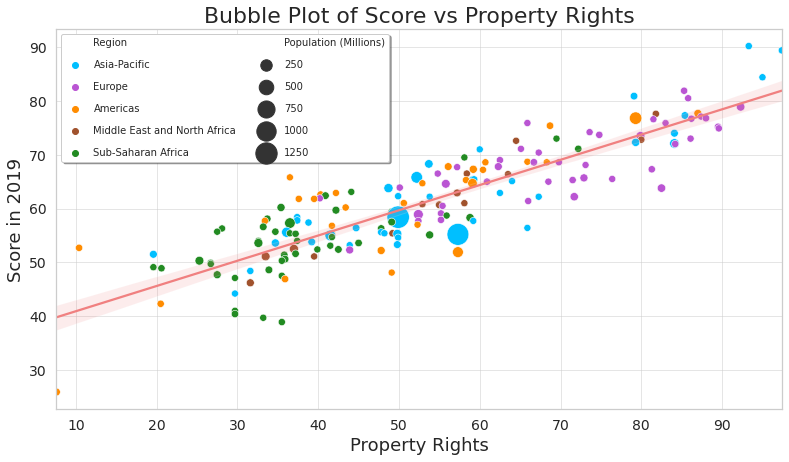

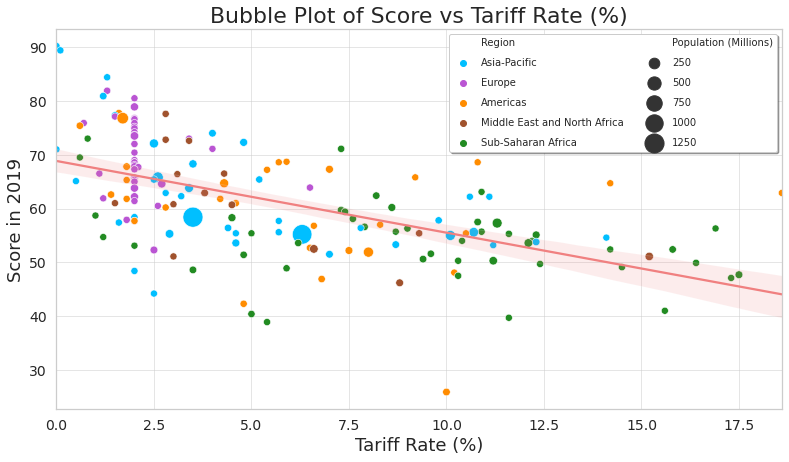

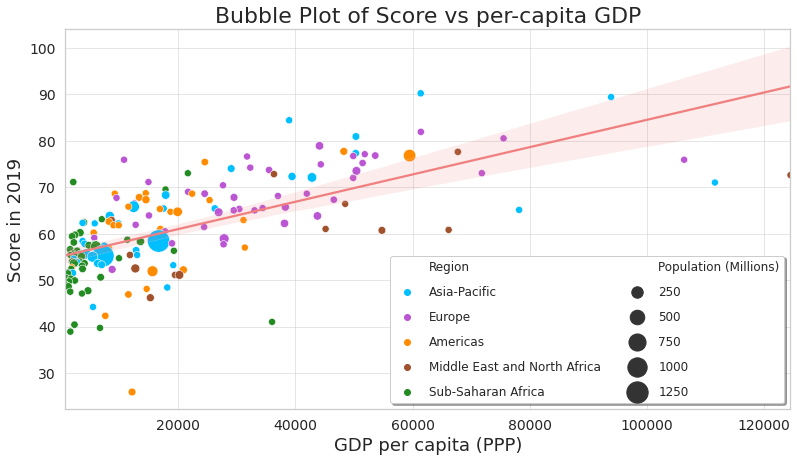

In [ ]:
plt.figure(figsize = (13,7))
sns.scatterplot(df["Property Rights"], df["2019 Score"], size = df["Population (Millions)"], sizes = (50,500),
                hue = df["Region"],palette=["deepskyblue", "mediumorchid", "darkorange", "sienna", "forestgreen"])
sns.regplot(df["Property Rights"], df["2019 Score"], scatter =False, color = 'lightcoral')
plt.xlabel("Property Rights", fontsize = 18)
plt.ylabel("Score in 2019", fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(fontsize = 10, ncol = 2, shadow = True, labelspacing = 1.2)
plt.title("Bubble Plot of Score vs Property Rights", fontsize = 22)
plt.grid(alpha = 0.5)
plt.show();

plt.figure(figsize = (13,7))
sns.scatterplot(df["Tariff Rate (%)"], df["2019 Score"], size = df["Population (Millions)"], sizes = (50,400),
                hue = df["Region"],palette=["deepskyblue", "mediumorchid", "darkorange", "sienna", "forestgreen"])
sns.regplot(df["Tariff Rate (%)"], df["2019 Score"], scatter =False, color = 'lightcoral')
plt.xlabel("Tariff Rate (%)", fontsize = 18)
plt.ylabel("Score in 2019", fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(fontsize = 10, ncol = 2, shadow = True, labelspacing = 1)
plt.title("Bubble Plot of Score vs Tariff Rate (%)", fontsize = 22)
plt.grid(alpha = 0.5)
plt.show();

plt.figure(figsize = (13,7))
sns.scatterplot(df["GDP per Capita (PPP)"], df["2019 Score"], size = df["Population (Millions)"], sizes = (50,500), 
                hue = df["Region"],palette=["deepskyblue", "mediumorchid", "darkorange", "sienna", "forestgreen"])
sns.regplot(df["GDP per Capita (PPP)"], df["2019 Score"], scatter = False, color = 'lightcoral' )
plt.xlabel("GDP per capita (PPP)", fontsize = 18)
plt.ylabel("Score in 2019", fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title("Bubble Plot of Score vs per-capita GDP", fontsize = 22)
plt.legend(fontsize = 12, ncol = 2, shadow = True, labelspacing = 1)
plt.grid(alpha = 0.5)
plt.show();

###**Null Hypothesis**: Following variables are from a normal distribution.
###**Alternate Hypothesis**: Following Variables are not from a normal distribution.


#####A higher log likelihood(less negative) implies a higher degree of 'normality' of the distribution.
#####A QQ-plot closely following the straight lines shown would imply a higher degree of 'normality'.
#####For a chi-squared goodness-of-fit(normality) test, if the p-value is less than a specified value(let us say x for a confidence value of [(1-x)*100]%), i.e. 0.05 for 95% confidence, the null hypothesis is rejected in favour of the alternative hypothesis.

31
-------------------------------------------------------------------------

For 2019 Score:


<Figure size 720x360 with 0 Axes>

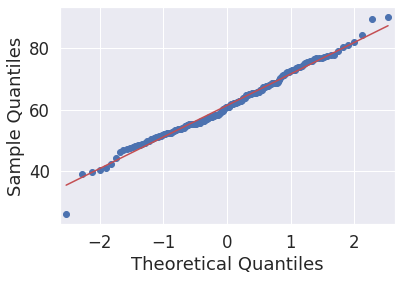


Log Likelihood: -648.2815045138599
95% Confidence Interval:(59.815677158405684, 62.88258873754807)
p-value of chi-squared normality test= 0.5579013345608126
Null Hypothesis cannot be rejected in favour of Alternate Hypothesis.
-------------------------------------------------------------------------

For Property Rights:


<Figure size 720x360 with 0 Axes>

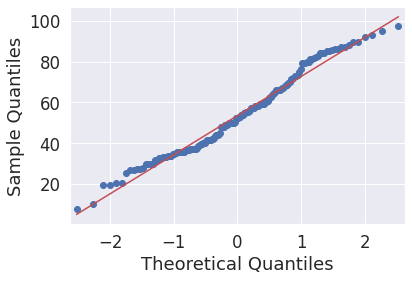


Log Likelihood: -inf
95% Confidence Interval:(50.69643677817657, 56.42726264378873)
p-value of chi-squared normality test= 0.02862745842851917
Null Hypothesis is rejected in favour of Alternate Hypothesis.
-------------------------------------------------------------------------

For Judical Effectiveness:


<Figure size 720x360 with 0 Axes>

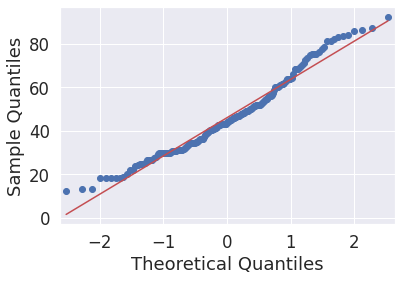


Log Likelihood: -741.606858577325
95% Confidence Interval:(43.414842437067186, 48.67533097333749)
p-value of chi-squared normality test= 0.019103219696599814
Null Hypothesis is rejected in favour of Alternate Hypothesis.
-------------------------------------------------------------------------

For Government Integrity:


<Figure size 720x360 with 0 Axes>

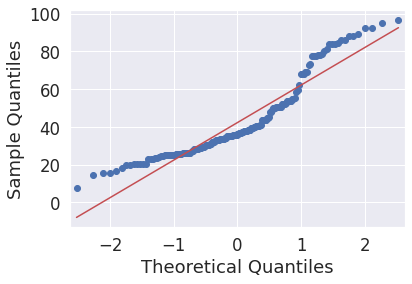


Log Likelihood: -inf
95% Confidence Interval:(39.31529430996198, 45.25349181720565)
p-value of chi-squared normality test= 1.5768117000641602e-06
Null Hypothesis is rejected in favour of Alternate Hypothesis.
-------------------------------------------------------------------------

For Tax Burden:


<Figure size 720x360 with 0 Axes>

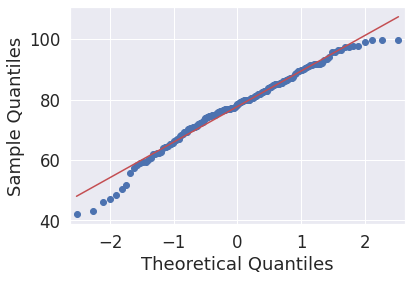


Log Likelihood: -671.765032473807
95% Confidence Interval:(75.94764527520657, 79.46044721034237)
p-value of chi-squared normality test= 0.008396793400264514
Null Hypothesis is rejected in favour of Alternate Hypothesis.
-------------------------------------------------------------------------

For Gov't Spending:


<Figure size 720x360 with 0 Axes>

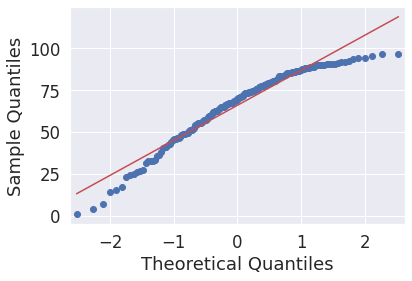


Log Likelihood: -inf
95% Confidence Interval:(62.89616862052945, 69.1419816684879)
p-value of chi-squared normality test= 0.00010663700680331536
Null Hypothesis is rejected in favour of Alternate Hypothesis.
-------------------------------------------------------------------------

For Fiscal Health:


<Figure size 720x360 with 0 Axes>

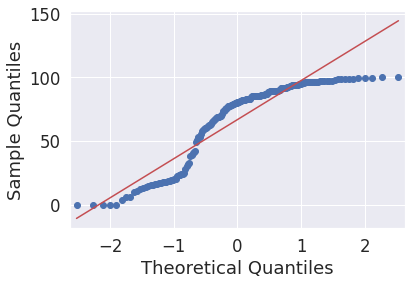


Log Likelihood: -inf
95% Confidence Interval:(62.21996417942567, 71.40315720785763)
p-value of chi-squared normality test= 2.5866334992590413e-06
Null Hypothesis is rejected in favour of Alternate Hypothesis.
-------------------------------------------------------------------------

For Business Freedom:


<Figure size 720x360 with 0 Axes>

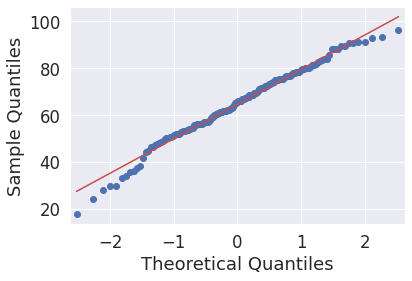


Log Likelihood: -710.8052035039406
95% Confidence Interval:(62.52149771100314, 66.92358899419922)
p-value of chi-squared normality test= 0.07047912238677251
Null Hypothesis cannot be rejected in favour of Alternate Hypothesis.
-------------------------------------------------------------------------

For Labor Freedom:


<Figure size 720x360 with 0 Axes>

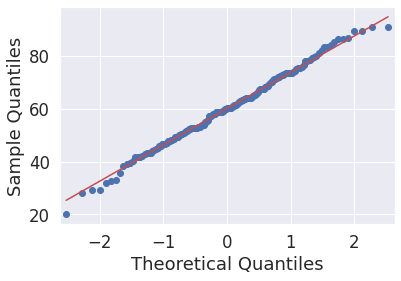


Log Likelihood: -698.7715846885004
95% Confidence Interval:(57.998297448555284, 62.10459272485512)
p-value of chi-squared normality test= 0.9430100212759052
Null Hypothesis cannot be rejected in favour of Alternate Hypothesis.
-------------------------------------------------------------------------

For Monetary Freedom:


<Figure size 720x360 with 0 Axes>

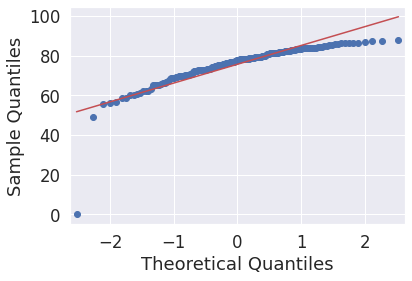


Log Likelihood: -634.4791975738121
95% Confidence Interval:(74.26679239979472, 77.09852551928043)
p-value of chi-squared normality test= 1.1739393799777711e-35
Null Hypothesis is rejected in favour of Alternate Hypothesis.
-------------------------------------------------------------------------

For Trade Freedom:


<Figure size 720x360 with 0 Axes>

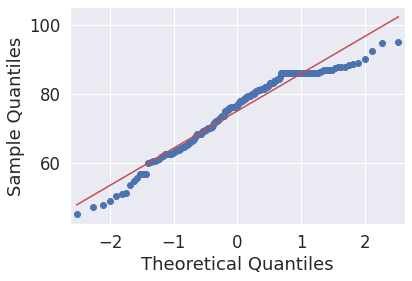


Log Likelihood: -657.0522433668017
95% Confidence Interval:(73.40934012163324, 76.63574658356906)
p-value of chi-squared normality test= 0.004191054151324701
Null Hypothesis is rejected in favour of Alternate Hypothesis.
-------------------------------------------------------------------------

For Investment Freedom :


<Figure size 720x360 with 0 Axes>

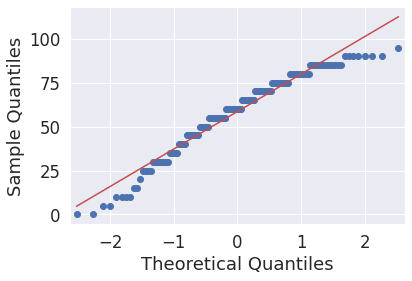


Log Likelihood: -inf
95% Confidence Interval:(55.39373803185948, 61.77389202594399)
p-value of chi-squared normality test= 0.0021983077261290888
Null Hypothesis is rejected in favour of Alternate Hypothesis.
-------------------------------------------------------------------------

For Financial Freedom:


<Figure size 720x360 with 0 Axes>

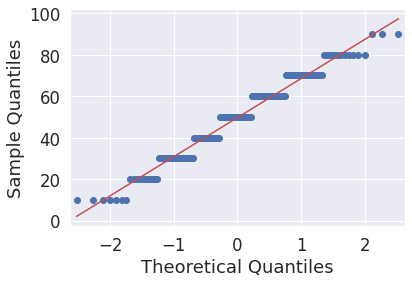


Log Likelihood: -inf
95% Confidence Interval:(46.83364214818494, 52.472716233317946)
p-value of chi-squared normality test= 0.06732834689383368
Null Hypothesis cannot be rejected in favour of Alternate Hypothesis.
-------------------------------------------------------------------------

For Tariff Rate (%):


<Figure size 720x360 with 0 Axes>

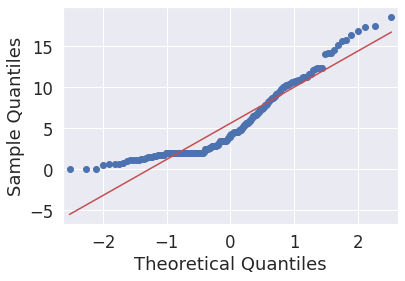


Log Likelihood: -501.6168307139846
95% Confidence Interval:(4.966816059348992, 6.280582784581644)
p-value of chi-squared normality test= 3.280411013266228e-05
Null Hypothesis is rejected in favour of Alternate Hypothesis.
-------------------------------------------------------------------------

For Income Tax Rate (%):


<Figure size 720x360 with 0 Axes>

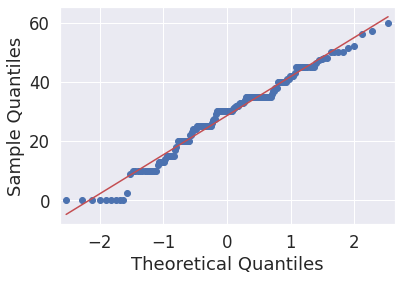


Log Likelihood: -691.8133277973637
95% Confidence Interval:(26.631839853217556, 30.576252632331574)
p-value of chi-squared normality test= 0.22400040136803168
Null Hypothesis cannot be rejected in favour of Alternate Hypothesis.
-------------------------------------------------------------------------

For Corporate Tax Rate (%):


<Figure size 720x360 with 0 Axes>

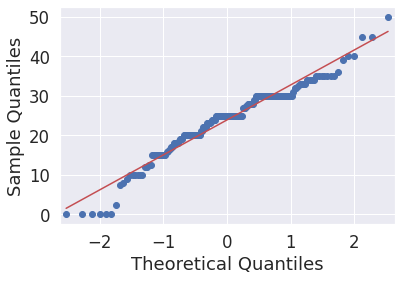


Log Likelihood: -622.7415326630138
95% Confidence Interval:(22.59377346514219, 25.23975254641851)
p-value of chi-squared normality test= 0.004095930980309038
Null Hypothesis is rejected in favour of Alternate Hypothesis.
-------------------------------------------------------------------------

For Tax Burden % of GDP:


<Figure size 720x360 with 0 Axes>

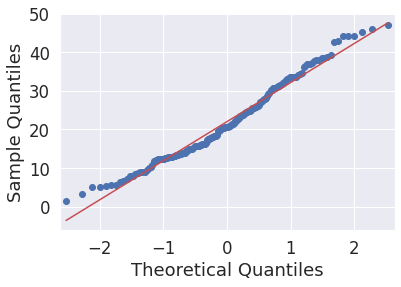


Log Likelihood: -645.92586505085
95% Confidence Interval:(20.532947604322757, 23.558381875446038)
p-value of chi-squared normality test= 0.022783575723009753
Null Hypothesis is rejected in favour of Alternate Hypothesis.
-------------------------------------------------------------------------

For Gov't Expenditure % of GDP :


<Figure size 720x360 with 0 Axes>

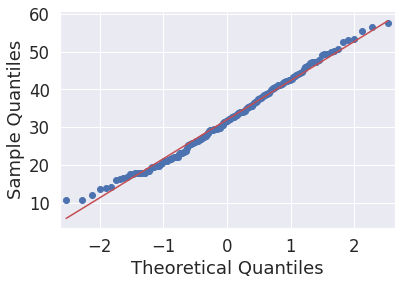


Log Likelihood: -649.8954956213283
95% Confidence Interval:(30.475292389110862, 33.57095038545562)
p-value of chi-squared normality test= 0.07240561735712552
Null Hypothesis cannot be rejected in favour of Alternate Hypothesis.
-------------------------------------------------------------------------

For Population (Millions):


<Figure size 720x360 with 0 Axes>

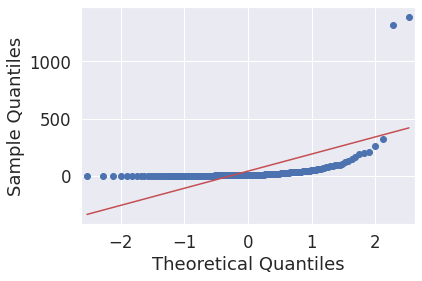


Log Likelihood: -inf
95% Confidence Interval:(19.754469641486455, 64.42934538741528)
p-value of chi-squared normality test= 4.452533068682008e-63
Null Hypothesis is rejected in favour of Alternate Hypothesis.
-------------------------------------------------------------------------

For GDP (Billions, PPP):


<Figure size 720x360 with 0 Axes>

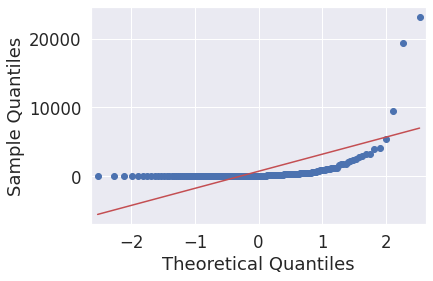


Log Likelihood: -inf
95% Confidence Interval:(358.37228553946676, 1099.345633535678)
p-value of chi-squared normality test= 4.761590008854179e-59
Null Hypothesis is rejected in favour of Alternate Hypothesis.
-------------------------------------------------------------------------

For GDP Growth Rate (%):


<Figure size 720x360 with 0 Axes>

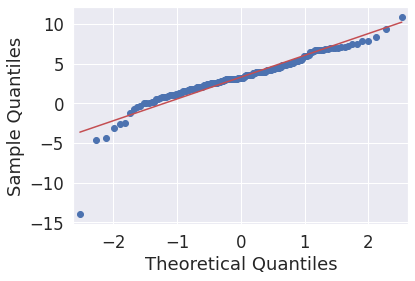


Log Likelihood: -419.9178100204744
95% Confidence Interval:(2.8811200176464666, 3.700382872526946)
p-value of chi-squared normality test= 4.243463061978137e-18
Null Hypothesis is rejected in favour of Alternate Hypothesis.
-------------------------------------------------------------------------

For 5 Year GDP Growth Rate (%):


<Figure size 720x360 with 0 Axes>

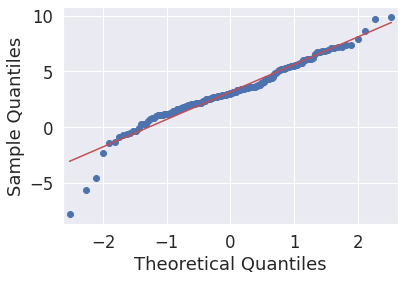


Log Likelihood: -401.20279018982455
95% Confidence Interval:(2.804045750987777, 3.539306850168291)
p-value of chi-squared normality test= 3.340428365005922e-06
Null Hypothesis is rejected in favour of Alternate Hypothesis.
-------------------------------------------------------------------------

For GDP per Capita (PPP):


<Figure size 720x360 with 0 Axes>

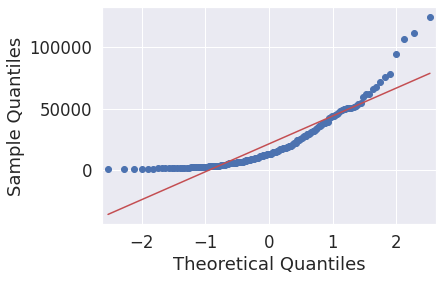


Log Likelihood: -inf
95% Confidence Interval:(17888.377228123463, 24665.622771876537)
p-value of chi-squared normality test= 5.19529622944429e-17
Null Hypothesis is rejected in favour of Alternate Hypothesis.
-------------------------------------------------------------------------

For Unemployment (%):


<Figure size 720x360 with 0 Axes>

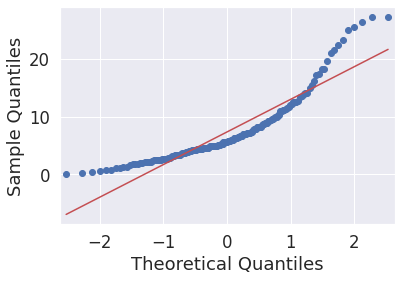


Log Likelihood: -545.418190090265
95% Confidence Interval:(6.4862225889296115, 8.178517295463454)
p-value of chi-squared normality test= 1.164236965085957e-13
Null Hypothesis is rejected in favour of Alternate Hypothesis.
-------------------------------------------------------------------------

For Inflation (%):


<Figure size 720x360 with 0 Axes>

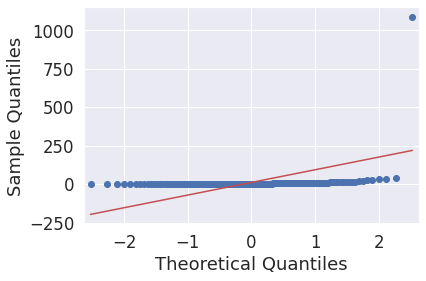


Log Likelihood: -inf
95% Confidence Interval:(-1.4318964381850403, 23.171780831248626)
p-value of chi-squared normality test= 6.617285132079107e-83
Null Hypothesis is rejected in favour of Alternate Hypothesis.
-------------------------------------------------------------------------

For FDI Inflow (Millions):


<Figure size 720x360 with 0 Axes>

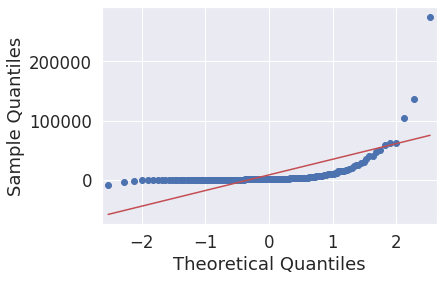


Log Likelihood: -inf
95% Confidence Interval:(4352.917377281317, 12254.687246996129)
p-value of chi-squared normality test= 1.2796010595960785e-59
Null Hypothesis is rejected in favour of Alternate Hypothesis.
-------------------------------------------------------------------------

For Public Debt (% of GDP):


<Figure size 720x360 with 0 Axes>

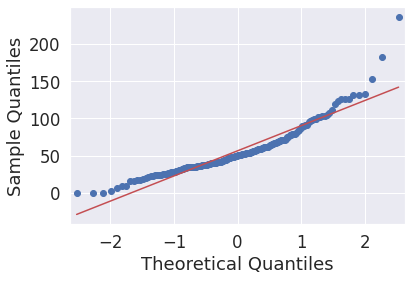


Log Likelihood: -inf
95% Confidence Interval:(51.6222936035843, 61.71181044265844)
p-value of chi-squared normality test= 6.149784190902056e-16
Null Hypothesis is rejected in favour of Alternate Hypothesis.


0
0                   2019 Score
1             Business Freedom
2                Labor Freedom
3            Financial Freedom
4          Income Tax Rate (%)
5  Gov't Expenditure % of GDP

In [ ]:
print(len(df.columns))
normal=[]
for col in df.columns:
  if col != 'World Rank' and col != 'Region Rank' :
    if (df[col].dtype != object):
      plt.figure(figsize=(10,5))
      sns.set(font_scale=1.5) 
      print('-------------------------------------------------------------------------')
      print("\nFor "+str(col)+":")
      sm.qqplot(df[col], line='s')
      plt.show()
      
      mean=df[col].mean()
      var=df[col].var()
      n=len(df[col])
      dif=df[col]-mean
      for i in range(len(dif)):
        dif[i]=dif[i]**2
      #print(n)#print(mean)#print(var)#print(dif)
      logl=np.log(((2*np.pi*var)**(-n/2))*np.exp(-1*np.sum(dif)/(2*var)))
      print("\nLog Likelihood: "+str(logl))
      print("95% Confidence Interval:"+str(stats.norm.interval(0.95, loc=mean, scale=np.sqrt(var)/np.sqrt(n))))

      s, p = stats.normaltest(df[col])
      print('p-value of chi-squared normality test= '+ str(p))

      if p<=0.05:
        print('Null Hypothesis is rejected in favour of Alternate Hypothesis.')
      else:
        print('Null Hypothesis cannot be rejected in favour of Alternate Hypothesis.')
        normal.append(col)

display(pd.DataFrame(normal))

###Top 20 Countries

In [ ]:
top20 = df.loc[0:19, :]
top20_list = list(top20["Country Name"])
print(top20_list)

['Hong Kong', 'Singapore', 'New Zealand', 'Switzerland', 'Australia', 'Ireland', 'United Kingdom', 'Canada', 'United Arab Emirates', 'Taiwan ', 'Iceland', 'Netherlands', 'United States', 'Denmark', 'Estonia', 'Luxembourg', 'Georgia', 'Chile', 'Sweden', 'Finland']


##Happiness Index 2015-2019
###2015.csv, 2016.csv, 2017.csv, 2018.csv, 2019.csv
###**df2015-df2019**

In [ ]:
#Yearwise data of World Happiness Report (2015-2019)                                       
df2015 = pd.read_csv('/content/2015.csv', encoding = "ISO-8859-1")
df2015["Year"] = [2015]*len(df2015.index)
df2016 = pd.read_csv('/content/2016.csv', encoding = "ISO-8859-1")
df2016["Year"] = [2016]*len(df2016.index)
df2017 = pd.read_csv('/content/2017.csv', encoding = "ISO-8859-1")
df2017["Year"] = [2017]*len(df2017.index)
df2018 = pd.read_csv('/content/2018.csv', encoding = "ISO-8859-1")
df2018["Year"] = [2018]*len(df2018.index)
# df2018.rename(columns = {"Country or region" : "Country"})
df2019 = pd.read_csv('/content/2019.csv', encoding = "ISO-8859-1")
df2019["Year"] = [2019]*len(df2019.index)
# df2018.rename(columns = {"Country or region" : "Country"})

# df1 = df2015.append(df2016).append(df2017).groupby(["Country", "Year"]).mean()
# df2 = df2018.append(df2019).groupby(["Country or region", "Year"]).mean()
# display(df1, df2)
display(df2015.head(), df2016.head(), df2017.head(), df2018.head(), df2019.head())
display(df2015.describe(), df2016.describe(), df2017.describe(), df2018.describe(), df2019.describe())

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  Year  
0     0.29678            2.51738  2015  
1     0.43630            2.70201  2015  
2     0.34139            2.49204  2015  
3     0.34699            2.46531  2015  
4     0.45811            2.45176  2015

Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                   1.42666  1.18326                   0.86733  0.56624   
3                   1.57744  1.12690                   0.79579  0.59609   
4                   1.40598  1.13464                   0.81091  0.57104   

   Trust (Government Corruption)  Generosity  Dystopia Residual  Year  
0                        0.44453     0.36171            2.73939  2016  
1                        0.41203     0.28083            2.69463  2016  
2                        0.14975     0.47678            2.83137  2016  
3                        0.35776     0.37895            2.66465  2016  
4                        0.41004     0.25492            2.82596  2016

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  Year  
0    0.362012                       0.315964           2.277027  2017  
1    0.355280                       0.400770           2.313707  2017  
2    0.475540                       0.153527           2.322715  2017  
3    0.290549                       0.367007           2.276716  2017  
4    0.245483                       0.382612           2.430182  2017

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   
2             3           Denmark  7.555           1.351           1.590   
3             4           Iceland  7.495           1.343           1.644   
4             5       Switzerland  7.487           1.420           1.549   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   
2                    0.868                         0.683       0.284   
3                    0.914                         0.677       0.353   
4                    0.927                         0.660       0.256   

   Perceptions of corruption  Year  
0                      0.393  2018  
1                      0.340  2018  
2                      0.408  2018  
3                      0.138  2018  
4                      0.357  2018

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  Year  
0                      0.393  2019  
1                      0.410  2019  
2                      0.341  2019  
3                      0.118  2019  
4                      0.298  2019

Happiness Rank  Happiness Score  Standard Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                158.000000  158.000000                158.000000   
mean                   0.846137    0.991046                  0.630259   
std                    0.403121    0.272369                  0.247078   
min                    0.000000    0.000000                  0.000000   
25%                    0.545808    0.856823                  0.439185   
50%                    0.910245    1.029510                  0.696705   
75%                    1.158448    1.214405                  0.811013   
max                    1.690420    1.402230                  1.025250   

          Freedom  Trust (Government Corruption)  Generosity  \
count  158.000000                     158.000000  158.000000   
mean     0.428615                       0.143422    0.237296   
std      0.150693                       0.120034    0.126685   
min      0.000000                       0.000000    0.000000   
25%      0.328330                       0.061675    0.150553   
50%      0.435515                       0.107220    0.216130   
75%      0.549092                       0.180255    0.309883   
max      0.669730                       0.551910    0.795880   

       Dystopia Residual    Year  
count         158.000000   158.0  
mean            2.098977  2015.0  
std             0.553550     0.0  
min             0.328580  2015.0  
25%             1.759410  2015.0  
50%             2.095415  2015.0  
75%             2.462415  2015.0  
max             3.602140  2015.0

Happiness Rank  Happiness Score  Lower Confidence Interval  \
count      157.000000       157.000000                 157.000000   
mean        78.980892         5.382185                   5.282395   
std         45.466030         1.141674                   1.148043   
min          1.000000         2.905000                   2.732000   
25%         40.000000         4.404000                   4.327000   
50%         79.000000         5.314000                   5.237000   
75%        118.000000         6.269000                   6.154000   
max        157.000000         7.526000                   7.460000   

       Upper Confidence Interval  Economy (GDP per Capita)      Family  \
count                 157.000000                157.000000  157.000000   
mean                    5.481975                  0.953880    0.793621   
std                     1.136493                  0.412595    0.266706   
min                     3.078000                  0.000000    0.000000   
25%                     4.465000                  0.670240    0.641840   
50%                     5.419000                  1.027800    0.841420   
75%                     6.434000                  1.279640    1.021520   
max                     7.669000                  1.824270    1.183260   

       Health (Life Expectancy)     Freedom  Trust (Government Corruption)  \
count                157.000000  157.000000                     157.000000   
mean                   0.557619    0.370994                       0.137624   
std                    0.229349    0.145507                       0.111038   
min                    0.000000    0.000000                       0.000000   
25%                    0.382910    0.257480                       0.061260   
50%                    0.596590    0.397470                       0.105470   
75%                    0.729930    0.484530                       0.175540   
max                    0.952770    0.608480                       0.505210   

       Generosity  Dystopia Residual    Year  
count  157.000000         157.000000   157.0  
mean     0.242635           2.325807  2016.0  
std      0.133756           0.542220     0.0  
min      0.000000           0.817890  2016.0  
25%      0.154570           2.031710  2016.0  
50%      0.222450           2.290740  2016.0  
75%      0.311850           2.664650  2016.0  
max      0.819710           3.837720  2016.0

Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
count      155.000000       155.000000    155.000000   155.000000   
mean        78.000000         5.354019      5.452326     5.255713   
std         44.888751         1.131230      1.118542     1.145030   
min          1.000000         2.693000      2.864884     2.521116   
25%         39.500000         4.505500      4.608172     4.374955   
50%         78.000000         5.279000      5.370032     5.193152   
75%        116.500000         6.101500      6.194600     6.006527   
max        155.000000         7.537000      7.622030     7.479556   

       Economy..GDP.per.Capita.      Family  Health..Life.Expectancy.  \
count                155.000000  155.000000                155.000000   
mean                   0.984718    1.188898                  0.551341   
std                    0.420793    0.287263                  0.237073   
min                    0.000000    0.000000                  0.000000   
25%                    0.663371    1.042635                  0.369866   
50%                    1.064578    1.253918                  0.606042   
75%                    1.318027    1.414316                  0.723008   
max                    1.870766    1.610574                  0.949492   

          Freedom  Generosity  Trust..Government.Corruption.  \
count  155.000000  155.000000                     155.000000   
mean     0.408786    0.246883                       0.123120   
std      0.149997    0.134780                       0.101661   
min      0.000000    0.000000                       0.000000   
25%      0.303677    0.154106                       0.057271   
50%      0.437454    0.231538                       0.089848   
75%      0.516561    0.323762                       0.153296   
max      0.658249    0.838075                       0.464308   

       Dystopia.Residual    Year  
count         155.000000   155.0  
mean            1.850238  2017.0  
std             0.500028     0.0  
min             0.377914  2017.0  
25%             1.591291  2017.0  
50%             1.832910  2017.0  
75%             2.144654  2017.0  
max             3.117485  2017.0

Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.375917        0.891449        1.213237   
std       45.177428    1.119506        0.391921        0.302372   
min        1.000000    2.905000        0.000000        0.000000   
25%       39.750000    4.453750        0.616250        1.066750   
50%       78.500000    5.378000        0.949500        1.255000   
75%      117.250000    6.168500        1.197750        1.463000   
max      156.000000    7.632000        2.096000        1.644000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.597346                      0.454506    0.181006   
std                   0.247579                      0.162424    0.098471   
min                   0.000000                      0.000000    0.000000   
25%                   0.422250                      0.356000    0.109500   
50%                   0.644000                      0.487000    0.174000   
75%                   0.777250                      0.578500    0.239000   
max                   1.030000                      0.724000    0.598000   

       Perceptions of corruption    Year  
count                 155.000000   156.0  
mean                    0.112000  2018.0  
std                     0.096492     0.0  
min                     0.000000  2018.0  
25%                     0.051000  2018.0  
50%                     0.082000  2018.0  
75%                     0.137000  2018.0  
max                     0.457000  2018.0

Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.407096        0.905147        1.208814   
std       45.177428    1.113120        0.398389        0.299191   
min        1.000000    2.853000        0.000000        0.000000   
25%       39.750000    4.544500        0.602750        1.055750   
50%       78.500000    5.379500        0.960000        1.271500   
75%      117.250000    6.184500        1.232500        1.452500   
max      156.000000    7.769000        1.684000        1.624000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.725244                      0.392571    0.184846   
std                   0.242124                      0.143289    0.095254   
min                   0.000000                      0.000000    0.000000   
25%                   0.547750                      0.308000    0.108750   
50%                   0.789000                      0.417000    0.177500   
75%                   0.881750                      0.507250    0.248250   
max                   1.141000                      0.631000    0.566000   

       Perceptions of corruption    Year  
count                 156.000000   156.0  
mean                    0.110603  2019.0  
std                     0.094538     0.0  
min                     0.000000  2019.0  
25%                     0.047000  2019.0  
50%                     0.085500  2019.0  
75%                     0.141250  2019.0  
max                     0.453000  2019.0

##Economic Freedom Index Yearwise
###efw_cc.csv
###**df0(complete), df_main(essence), df_co_year(country year sort)(moved to India Analysis), df_co(country sort)**

In [ ]:
# from google.colab import files
# uploaded = files.upload()
import io
df0 = pd.read_csv('/content/efw_cc.csv', encoding = "ISO-8859-1")   #https://www.kaggle.com/gsutters/economic-freedom for info about columns
display(df0) #original data

year ISO_code    countries  ECONOMIC FREEDOM   rank  quartile  \
0     2016      ALB      Albania              7.54   34.0       1.0   
1     2016      DZA      Algeria              4.99  159.0       4.0   
2     2016      AGO       Angola              5.17  155.0       4.0   
3     2016      ARG    Argentina              4.84  160.0       4.0   
4     2016      ARM      Armenia              7.57   29.0       1.0   
...    ...      ...          ...               ...    ...       ...   
3721  1970      VEN    Venezuela              7.18   10.0       1.0   
3722  1970      VNM      Vietnam               NaN    NaN       NaN   
3723  1970      YEM  Yemen, Rep.               NaN    NaN       NaN   
3724  1970      ZMB       Zambia               NaN    NaN       NaN   
3725  1970      ZWE     Zimbabwe               NaN    NaN       NaN   

      1a_government_consumption  1b_transfers  1c_gov_enterprises  \
0                      8.232353      7.509902                 8.0   
1                      2.150000      7.817129                 0.0   
2                      7.600000      8.886739                 0.0   
3                      5.335294      6.048930                 6.0   
4                      7.264706      7.748532                 8.0   
...                         ...           ...                 ...   
3721                   6.602003      9.827430                 7.0   
3722                        NaN           NaN                 NaN   
3723                        NaN           NaN                 NaN   
3724                   3.448131      9.105430                 0.0   
3725                   7.806922           NaN                 2.0   

      1d_top_marg_tax_rate  1_size_government  2a_judicial_independence  \
0                      8.0           7.935564                  2.668222   
1                      4.5           3.616782                  4.186704   
2                      9.5           6.496685                  1.843129   
3                      4.0           5.346056                  3.689690   
4                      5.0           7.003310                  3.867379   
...                    ...                ...                       ...   
3721                   NaN           7.809811                       NaN   
3722                   NaN                NaN                       NaN   
3723                   NaN                NaN                       NaN   
3724                   NaN           4.184521                       NaN   
3725                   NaN           4.903461                       NaN   

      2b_impartial_courts  2c_protection_property_rights  \
0                3.145462                       4.512228   
1                4.327113                       4.689952   
2                1.974566                       2.512364   
3                2.930563                       4.255995   
4                4.197569                       5.664317   
...                   ...                            ...   
3721                  NaN                       4.500000   
3722                  NaN                            NaN   
3723                  NaN                            NaN   
3724                  NaN                            NaN   
3725                  NaN                            NaN   

      2d_military_interference  2e_integrity_legal_system  \
0                     8.333333                   4.166667   
1                     4.166667                   5.000000   
2                     3.333333                   4.166667   
3                     7.500000                   3.333333   
4                     5.833333                   5.000000   
...                        ...                        ...   
3721                       NaN                        NaN   
3722                       NaN                        NaN   
3723                       NaN                        NaN   
3724                       NaN                        NaN   
3725                       NaN 

In [ ]:
df0.dtypes

year                                    int64
ISO_code                               object
countries                              object
ECONOMIC FREEDOM                      float64
rank                                  float64
quartile                              float64
1a_government_consumption             float64
1b_transfers                          float64
1c_gov_enterprises                    float64
1d_top_marg_tax_rate                  float64
1_size_government                     float64
2a_judicial_independence              float64
2b_impartial_courts                   float64
2c_protection_property_rights         float64
2d_military_interference              float64
2e_integrity_legal_system             float64
2f_legal_enforcement_contracts        float64
2g_restrictions_sale_real_property    float64
2h_reliability_police                 float64
2i_business_costs_crime               float64
2j_gender_adjustment                  float64
2_property_rights                 

In [ ]:
df_main = df0[["year", "countries","ECONOMIC FREEDOM", "rank", "1_size_government", "2_property_rights", "3_sound_money", "4_trade", "5_regulation"]].dropna(axis = 0, how = "any")
display(df_main)

col=df_main.columns
print()
#print(col)
for i in range(5):
  sum=0
  for j in range(5):
    sum=sum+df_main.loc[i,col[j+4]]
  print(sum/5)
display(df_main.head())

print('Economic Freedom is the mean of these 5 parameters')

year       countries  ECONOMIC FREEDOM   rank  1_size_government  \
0     2016         Albania              7.54   34.0           7.935564   
1     2016         Algeria              4.99  159.0           3.616782   
2     2016          Angola              5.17  155.0           6.496685   
3     2016       Argentina              4.84  160.0           5.346056   
4     2016         Armenia              7.57   29.0           7.003310   
...    ...             ...               ...    ...                ...   
3709  1970        Thailand              6.20   25.0           7.889385   
3713  1970         Tunisia              4.44   47.0           4.892143   
3718  1970  United Kingdom              5.94   29.0           3.558029   
3719  1970   United States              7.77    4.0           5.272467   
3721  1970       Venezuela              7.18   10.0           7.809811   

      2_property_rights  3_sound_money   4_trade  5_regulation  
0              5.071814       9.553657  8.214900      6.906901  
1              4.690743       7.253894  4.127025      5.268992  
2              2.963635       5.606605  5.264754      5.518500  
3              3.904030       5.614336  3.982547      5.369019  
4              5.809215       9.521940  8.143241      7.378069  
...                 ...            ...       ...           ...  
3709           5.842222       6.708924  5.466667      5.092079  
3713           3.129436       6.884312  2.511111      4.804833  
3718           8.033465       5.985333  4.688889      7.410406  
3719           8.346500       9.588777  8.800000      6.841801  
3721           4.381393       9.713677  8.688889      5.312277  

[2891 rows x 9 columns]


7.5365671148
4.991487178199999
5.170035958200001
4.843197638
7.5711548288


year  countries  ECONOMIC FREEDOM   rank  1_size_government  \
0  2016    Albania              7.54   34.0           7.935564   
1  2016    Algeria              4.99  159.0           3.616782   
2  2016     Angola              5.17  155.0           6.496685   
3  2016  Argentina              4.84  160.0           5.346056   
4  2016    Armenia              7.57   29.0           7.003310   

   2_property_rights  3_sound_money   4_trade  5_regulation  
0           5.071814       9.553657  8.214900      6.906901  
1           4.690743       7.253894  4.127025      5.268992  
2           2.963635       5.606605  5.264754      5.518500  
3           3.904030       5.614336  3.982547      5.369019  
4           5.809215       9.521940  8.143241      7.378069

Economic Freedom is the mean of these 5 parameters


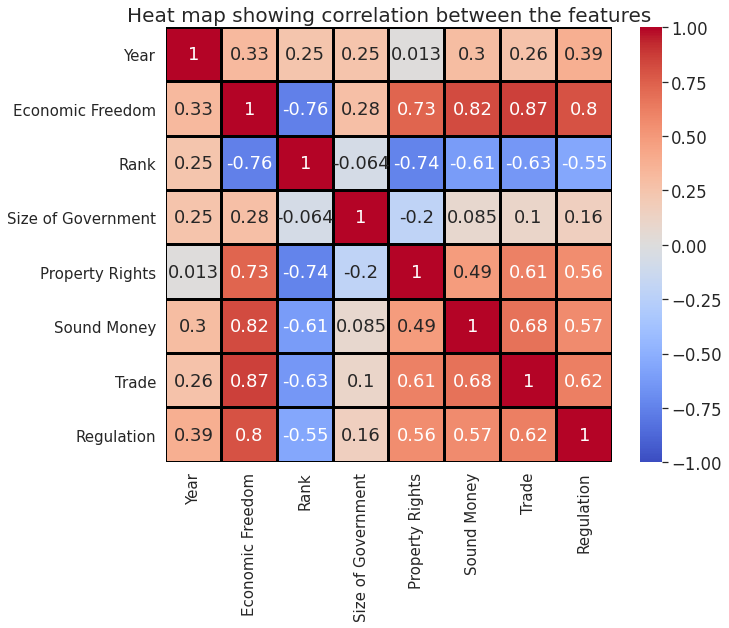

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(df_main.corr(), vmin = -1, vmax = 1, center= 0, annot = True, fmt = ".2g", cmap = "coolwarm", linecolor="black", linewidth = 2)
plt.title("Heat map showing correlation between the features", fontsize = 20)
plt.xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5],["Year", "Economic Freedom", "Rank", "Size of Government", "Property Rights", "Sound Money", "Trade", "Regulation"], fontsize = 15)
plt.yticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5], ["Year", "Economic Freedom", "Rank", "Size of Government", "Property Rights", "Sound Money", "Trade", "Regulation"], fontsize = 15);

In [ ]:
df_co = df_main.groupby("countries").mean().sort_values(by = "ECONOMIC FREEDOM", ascending = False).drop(['year'],axis=1)
display(df_co)

ECONOMIC FREEDOM        rank  1_size_government  \
countries                                                         
Hong Kong               8.886957    1.086957           9.117601   
Singapore               8.525217    3.130435           7.988378   
Switzerland             8.271818    4.000000           7.390134   
United States           8.132609    6.478261           6.582181   
New Zealand             8.053478    7.043478           5.937436   
...                          ...         ...                ...   
Venezuela               4.717826  111.347826           5.499819   
Congo, Dem. R.          4.689048  129.238095           6.464622   
Congo, Rep. Of          4.636190  129.428571           4.588452   
Zimbabwe                4.512381  124.047619           6.375210   
Myanmar                 4.294706  139.529412           5.867990   

                2_property_rights  3_sound_money   4_trade  5_regulation  
countries                                                                 
Hong Kong                7.710210       9.272204  9.492686      8.844669  
Singapore                8.155486       9.029325  9.260102      8.194222  
Switzerland              8.336966       9.610372  8.092143      7.935853  
United States            7.771940       9.603735  8.212076      8.487184  
New Zealand              8.489202       8.929429  8.541902      8.364555  
...                           ...            ...       ...           ...  
Venezuela                3.187264       5.216102  5.109995      4.578535  
Congo, Dem. R.           1.815148       5.109360  5.101439      4.954033  
Congo, Rep. Of           2.621637       5.176698  5.142599      5.650283  
Zimbabwe                 3.658939       3.641556  4.132258      4.758026  
Myanmar                  3.110234       5.286850  2.675569      4.529133  

[162 rows x 7 columns]

###**Null Hypothesis**: Following variables are from a normal distribution.
###**Alternate Hypothesis**: Following Variables are not from a normal distribution.


#####A higher log likelihood(less negative) implies a higher degree of 'normality' of the distribution.
#####A QQ-plot closely following the straight lines shown would imply a higher degree of 'normality'.
#####For a chi-squared goodness-of-fit(normality) test, if the p-value is less than a specified value(let us say x for a confidence value of [(1-x)*100]%), i.e. 0.05 for 95% confidence, the null hypothesis is rejected in favour of the alternative hypothesis.

7
-------------------------------------------------------------------------

For ECONOMIC FREEDOM:


<Figure size 720x360 with 0 Axes>

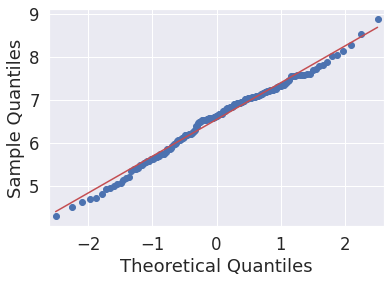


Log Likelihood: -204.47805057327145
95% Confidence Interval:(6.41507770639135, 6.679193723415389)
p-value of chi-squared normality test= 0.3663785345251747
Null Hypothesis cannot be rejected in favour of Alternate Hypothesis.
-------------------------------------------------------------------------

For 1_size_government:


<Figure size 720x360 with 0 Axes>

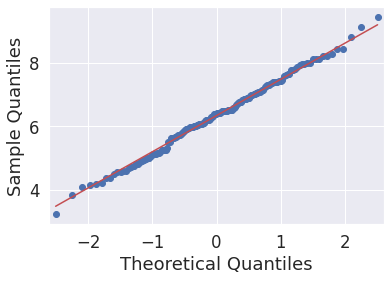


Log Likelihood: -250.96383022979512
95% Confidence Interval:(6.16042028532472, 6.5123170048749435)
p-value of chi-squared normality test= 0.9105420300990167
Null Hypothesis cannot be rejected in favour of Alternate Hypothesis.
-------------------------------------------------------------------------

For 2_property_rights:


<Figure size 720x360 with 0 Axes>

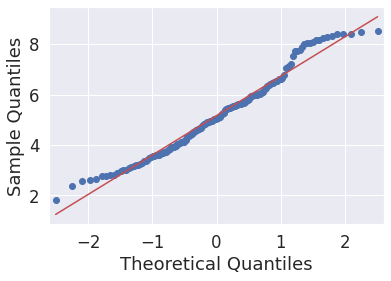


Log Likelihood: -302.50114334007293
95% Confidence Interval:(4.921958311810579, 5.40566044239592)
p-value of chi-squared normality test= 0.048328542134202464
Null Hypothesis is rejected in favour of Alternate Hypothesis.
-------------------------------------------------------------------------

For 3_sound_money:


<Figure size 720x360 with 0 Axes>

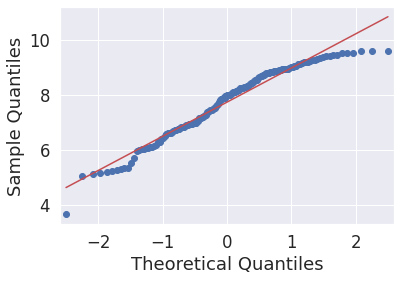


Log Likelihood: -265.158434769407
95% Confidence Interval:(7.542398258345432, 7.926519692684077)
p-value of chi-squared normality test= 0.01381662312449293
Null Hypothesis is rejected in favour of Alternate Hypothesis.
-------------------------------------------------------------------------

For 4_trade:


<Figure size 720x360 with 0 Axes>

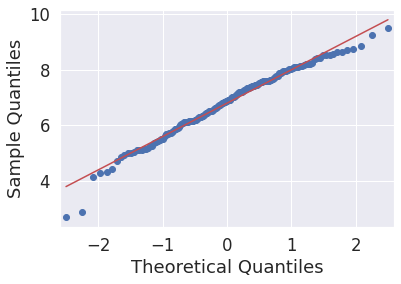


Log Likelihood: -259.4128511013913
95% Confidence Interval:(6.606075285381101, 6.976812009425673)
p-value of chi-squared normality test= 0.019117057989453918
Null Hypothesis is rejected in favour of Alternate Hypothesis.
-------------------------------------------------------------------------

For 5_regulation:


<Figure size 720x360 with 0 Axes>

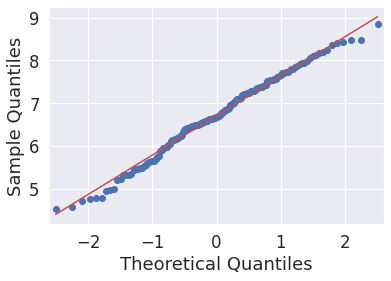


Log Likelihood: -217.13811023130842
95% Confidence Interval:(6.56677652848508, 6.8523607498006625)
p-value of chi-squared normality test= 0.25788282003241025
Null Hypothesis cannot be rejected in favour of Alternate Hypothesis.


0
0   ECONOMIC FREEDOM
1  1_size_government
2       5_regulation

In [ ]:
print(len(df_co.columns))
normal=[]
for col in df_co.columns:
  if (col != 'rank'):
    plt.figure(figsize=(10,5))
    sns.set(font_scale=1.5) 
    print('-------------------------------------------------------------------------')
    print("\nFor "+str(col)+":")
    sm.qqplot(df_co[col], line='s')
    plt.show()
    
    mean=df_co[col].mean()
    var=df_co[col].var()
    n=len(df_co[col])
    dif=df_co[col]-mean
    for i in range(len(dif)):
      dif[i]=dif[i]**2
    #print(n)#print(mean)#print(var)#print(dif)
    logl=np.log(((2*np.pi*var)**(-n/2))*np.exp(-1*np.sum(dif)/(2*var)))
    print("\nLog Likelihood: "+str(logl))
    print("95% Confidence Interval:"+str(stats.norm.interval(0.95, loc=mean, scale=np.sqrt(var)/np.sqrt(n))))

    s, p = stats.normaltest(df_co[col])
    print('p-value of chi-squared normality test= '+ str(p))

    if p<=0.05:
      print('Null Hypothesis is rejected in favour of Alternate Hypothesis.')
    else:
      print('Null Hypothesis cannot be rejected in favour of Alternate Hypothesis.')
      normal.append(col)
display(pd.DataFrame(normal))

## Effect of Economic Freedoms on Happiness of Citizens

### 2019 data
####**df_happiness(2019)**

In [ ]:
drop = []
countries = list(df["Country Name"].values.copy())
for country in df["Country Name"].values:
  if country in df_co.index.values and country in list(df2019["Country or region"].values):
    print(country, " Yes", round(df_co.loc[country, "rank"], 2))
  else:
    print(country, " No")
    drop.append(country)

for x in drop:
  countries.remove(x)

print(countries)
print(len(countries))
print(drop)
print(len(drop))

Hong Kong  Yes 1.09
Singapore  Yes 3.13
New Zealand  Yes 7.04
Switzerland  Yes 4.0
Australia  Yes 9.0
Ireland  Yes 10.91
United Kingdom  Yes 8.39
Canada  Yes 6.87
United Arab Emirates  No
Taiwan   No
Iceland  Yes 40.86
Netherlands  Yes 18.35
United States  Yes 6.48
Denmark  Yes 14.73
Estonia  Yes 16.61
Luxembourg  Yes 17.09
Georgia  Yes 24.86
Chile  Yes 22.27
Sweden  Yes 29.7
Finland  Yes 14.43
Lithuania  Yes 33.22
Malaysia  Yes 60.61
Czech Republic  No
Germany  Yes 18.04
Mauritius  Yes 20.0
Norway  Yes 26.22
Israel  Yes 52.65
Qatar  Yes 36.71
Korea, South  No
Japan  Yes 19.39
Austria  Yes 19.0
Rwanda  Yes 72.06
Macedonia  No
Macau  No
Latvia  Yes 29.0
Botswana  Yes 53.15
Bulgaria  Yes 61.89
Saint Lucia  No
Romania  Yes 53.21
Uruguay  Yes 49.19
Malta  Yes 32.8
Jamaica  Yes 48.86
Thailand  Yes 67.52
Cyprus  Yes 36.0
Poland  Yes 66.4
Peru  Yes 41.86
Armenia  Yes 26.46
Belgium  Yes 29.7
Colombia  Yes 85.19
Panama  Yes 32.05
Jordan  Yes 44.67
Albania  Yes 52.61
Bahrain  Yes 39.15
Indonesia

In [ ]:
df_happiness = pd.DataFrame(columns = ["Region", "Economic Freedom", "Happiness Score", "Population (Millions)"])
for i,country in enumerate(countries):
  df_happiness.loc[country] = [df.loc[df["Country Name"] == country, "Region"].item() ,df.loc[df["Country Name"] == country, "2019 Score"].item()/10, 
                               df2019.loc[df2019["Country or region"] == country,  "Score"].item(), df.loc[df["Country Name"] == country, "Population (Millions)"].item()]
display(df_happiness)

Region  Economic Freedom  Happiness Score  \
Hong Kong                    Asia-Pacific              9.02            5.430   
Singapore                    Asia-Pacific              8.94            6.262   
New Zealand                  Asia-Pacific              8.44            7.307   
Switzerland                        Europe              8.19            7.480   
Australia                    Asia-Pacific              8.09            7.228   
...                                   ...               ...              ...   
Ecuador                          Americas              4.69            6.028   
Algeria      Middle East and North Africa              4.62            5.211   
Bolivia                          Americas              4.23            5.779   
Zimbabwe               Sub-Saharan Africa              4.04            3.663   
Venezuela                        Americas              2.59            4.707   

             Population (Millions)  
Hong Kong                      7.4  
Singapore                      5.6  
New Zealand                    4.8  
Switzerland                    8.4  
Australia                     24.8  
...                            ...  
Ecuador                       16.8  
Algeria                       41.5  
Bolivia                       11.1  
Zimbabwe                      14.9  
Venezuela                     31.4  

[127 rows x 4 columns]

####**Null Hypothesis**: Following variables are from a normal distribution.
####**Alternate Hypothesis**: Following Variables are not from a normal distribution.


#####A higher log likelihood(less negative) implies a higher degree of 'normality' of the distribution.
#####A QQ-plot closely following the straight lines shown would imply a higher degree of 'normality'.
#####For a chi-squared goodness-of-fit(normality) test, if the p-value is less than a specified value(let us say x for a confidence value of [(1-x)*100]%), i.e. 0.05 for 95% confidence, the null hypothesis is rejected in favour of the alternative hypothesis.

4
-------------------------------------------------------------------------

For Economic Freedom:


<Figure size 720x360 with 0 Axes>

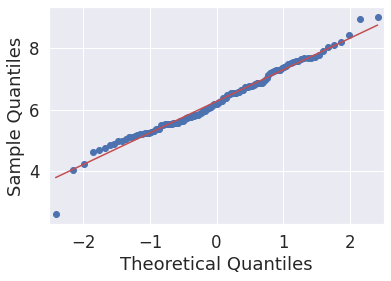


Log Likelihood: -183.4452635240309
95% Confidence Interval:(6.088993598296282, 6.4472268741446594)
p-value of chi-squared normality test= 0.3535860584743178
Null Hypothesis cannot be rejected in favour of Alternate Hypothesis.
-------------------------------------------------------------------------

For Happiness Score:


<Figure size 720x360 with 0 Axes>

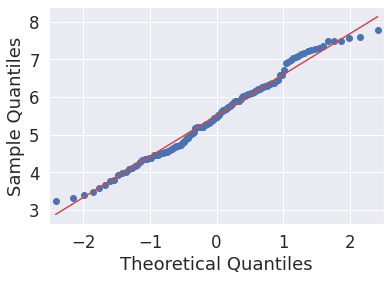


Log Likelihood: -190.4785552278877
95% Confidence Interval:(5.317439929134392, 5.696071881889231)
p-value of chi-squared normality test= 0.052225622330358296
Null Hypothesis cannot be rejected in favour of Alternate Hypothesis.


0
0  Economic Freedom
1   Happiness Score

In [ ]:
print(len(df_happiness.columns))
normal=[]
for col in df_happiness.columns:
  if col != 'Region' and col != 'Population (Millions)' :
    if (df_happiness[col].dtype != object):
      plt.figure(figsize=(10,5))
      sns.set(font_scale=1.5) 
      print('-------------------------------------------------------------------------')
      print("\nFor "+str(col)+":")
      sm.qqplot(df_happiness[col], line='s')
      plt.show()
      
      mean=df_happiness[col].mean()
      var=df_happiness[col].var()
      n=len(df_happiness[col])
      dif=df_happiness[col]-mean
      for i in range(len(dif)):
        dif[i]=dif[i]**2
      #print(n)#print(mean)#print(var)#print(dif)
      logl=np.log(((2*np.pi*var)**(-n/2))*np.exp(-1*np.sum(dif)/(2*var)))
      print("\nLog Likelihood: "+str(logl))
      print("95% Confidence Interval:"+str(stats.norm.interval(0.95, loc=mean, scale=np.sqrt(var)/np.sqrt(n))))

      s, p = stats.normaltest(df_happiness[col])
      print('p-value of chi-squared normality test= '+ str(p))

      if p<=0.05:
        print('Null Hypothesis is rejected in favour of Alternate Hypothesis.')
      else:
        print('Null Hypothesis cannot be rejected in favour of Alternate Hypothesis.')
        normal.append(col)

display(pd.DataFrame(normal))


####**Welch T-Test**: Null Hypothesis- Mean differences are zero for both sets of data, i.e. means are equal.

####**Wilcoxon Ranked Sign Test**: Null Hypothesis- Median Differences between both sets of data are zero.

In both tests, the alternative hypothesis is the exact complement of the null hypothesis. If the p-value is less than a specified value(let us say x for a confidence value of [(1-x)*100]%, i.e. 0.05 for 95% confidence, the null hypothesis is rejected in favour of the alternative hypothesis.

In [ ]:
n=len(df_happiness['Region'])
print(n)
m1=df_happiness['Economic Freedom'].mean()
m2=df_happiness['Happiness Score'].mean()
v1=df_happiness['Economic Freedom'].var()
v2=df_happiness['Happiness Score'].var()
assert v1 != v2

welcht=(m1-m2)/np.sqrt((v1/n)+(v2/n))
print("\nCalculated Welch T-Test statistic = "+str(welcht))
s,p=scipy.stats.ttest_ind(df_happiness['Economic Freedom'], df_happiness['Happiness Score'], equal_var= False)
print('p-value for Welch T-Test = '+str(p))
if p<=0.05:
  print('Null Hypothesis for Welch T-Test is rejected in favour of Alternate Hypothesis.')
else:
  print('Null Hypothesis for Welch T-Test cannot be rejected in favour of Alternate Hypothesis.')

s,p=scipy.stats.wilcoxon(x=df_happiness['Economic Freedom'], y=df_happiness['Happiness Score'])
print('\np-value for Wilcoxon Ranked Sign Test = '+str(p))
if p<=0.05:
  print('Null Hypothesis for Wilcoxon Ranked Sign Test is rejected in favour of Alternate Hypothesis.')
else:
  print('Null Hypothesis for Wilcoxon Ranked Sign Test cannot be rejected in favour of Alternate Hypothesis.')

127

Calculated Welch T-Test statistic = 5.725659221400019
p-value for Welch T-Test = 2.930242077076099e-08
Null Hypothesis for Welch T-Test is rejected in favour of Alternate Hypothesis.

p-value for Wilcoxon Ranked Sign Test = 2.2637703222566175e-15
Null Hypothesis for Wilcoxon Ranked Sign Test is rejected in favour of Alternate Hypothesis.


####**Correlation**

In [ ]:
stats.pearsonr(df_happiness["Economic Freedom"], df_happiness["Happiness Score"])

(0.6390435853149992, 6.238679971198706e-16)

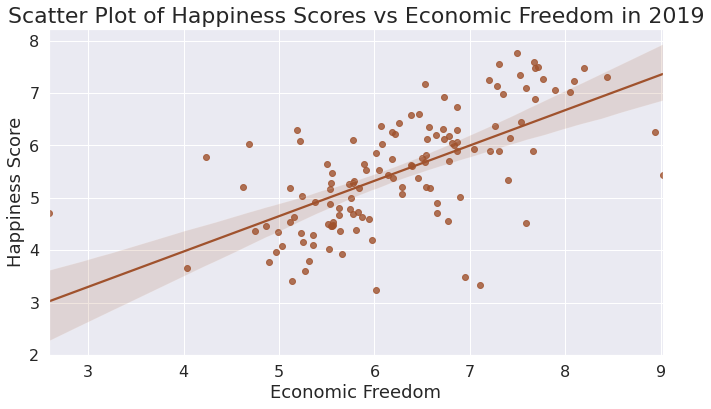

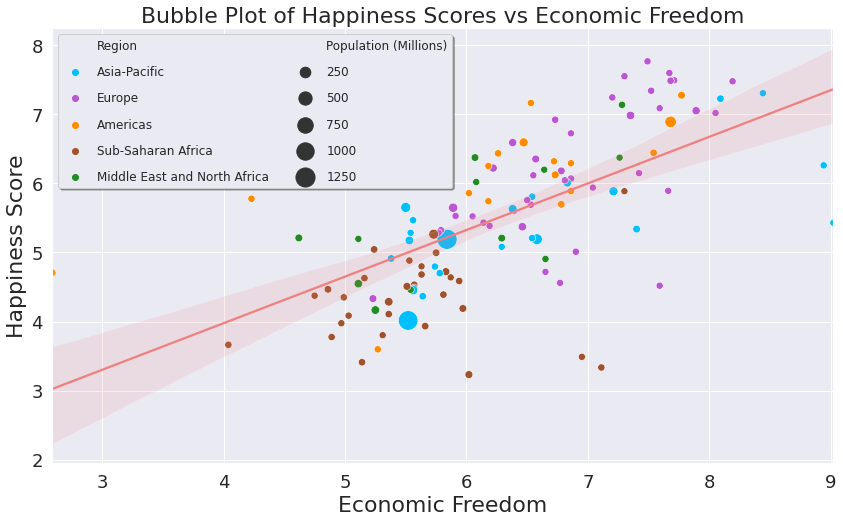

In [ ]:
plt.figure(figsize = (11, 6))
sns.regplot(df_happiness["Economic Freedom"], df_happiness["Happiness Score"], color = "sienna")
plt.title("Scatter Plot of Happiness Scores vs Economic Freedom in 2019", fontsize = 22)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("Economic Freedom", fontsize = 18)
plt.ylabel("Happiness Score" , fontsize = 18)
plt.show();

plt.figure(figsize = (14, 8))
sns.scatterplot(df_happiness["Economic Freedom"], df_happiness["Happiness Score"], 
                size = df_happiness["Population (Millions)"], sizes = (50,400),
                hue = df_happiness["Region"],palette=["deepskyblue", "mediumorchid", "darkorange", "sienna", "forestgreen"])
sns.regplot(df_happiness["Economic Freedom"], df_happiness["Happiness Score"], scatter =False, color = 'lightcoral')
plt.title("Bubble Plot of Happiness Scores vs Economic Freedom", fontsize = 22)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel("Economic Freedom", fontsize = 22)
plt.ylabel("Happiness Score" , fontsize = 22)
plt.legend(fontsize = 12, ncol = 2, shadow = True, labelspacing = 1.1)
plt.show();

In [ ]:
df_ha_reg = df_happiness.groupby("Region").mean().sort_values(by = "Happiness Score")
df_ha_reg

Economic Freedom  Happiness Score  \
Region                                                            
Sub-Saharan Africa                    5.563871         4.339452   
Asia-Pacific                          6.515217         5.408652   
Middle East and North Africa          5.991667         5.483750   
Americas                              6.073333         6.076000   
Europe                                6.857000         6.175875   

                              Population (Millions)  
Region                                               
Sub-Saharan Africa                        25.677419  
Asia-Pacific                             170.130435  
Middle East and North Africa              27.116667  
Americas                                  46.090476  
Europe                                    20.212500

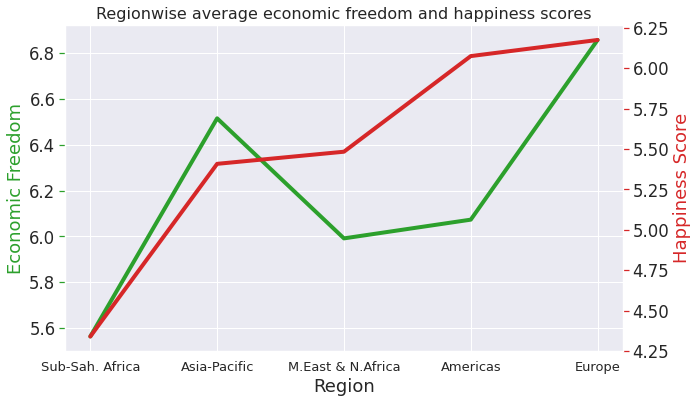

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
ax1.set_title('Regionwise average economic freedom and happiness scores', fontsize=16)
ax1.set_xlabel('Region', fontsize=18)
ax1.set_xticklabels(["Sub-Sah. Africa", "Asia-Pacific","M.East & N.Africa","Americas" ,"Europe"], {'fontsize': 13})
ax1.set_ylabel('Economic Freedom', fontsize=18, color=color)
ax1 = sns.lineplot(x=df_ha_reg.index.values, y=df_ha_reg["Economic Freedom"],linewidth = 4, color = color)
ax1.tick_params(axis='y', color = color)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Happiness Score', fontsize=18, color=color)
ax2 = sns.lineplot(x=df_ha_reg.index.values, y=df_ha_reg["Happiness Score"],linewidth = 4,  color=color)
ax2.tick_params(axis='y', color=color)
ax2.set_xticklabels(["Sub-Sah. Africa", "Asia-Pacific","M.East & N.Africa","Americas" ,"Europe"], {'fontsize': 13})
plt.grid(False)
plt.show()

### 2017 data
#### hfi_cc_2019.csv
####**df_happiness_2017, df_hfi_2017**

In [ ]:
df_hfi_full = pd.read_csv('/content/hfi_cc_2019.csv', encoding = "ISO-8859-1")
df_hfi_full_1 = pd.read_csv('/content/hfi_cc_2018.csv', encoding = "ISO-8859-1")
print(df_hfi_full_1['year'].unique())
print(df_hfi_full['year'].unique())
df_hfi = df_hfi_full[["year", "countries", "region", "hf_score", "hf_rank", "pf_score", "pf_rank", "ef_score", "ef_rank"]]
df_hfi_2017 = df_hfi.loc[df_hfi["year"] == 2017]
df_hfi_2017

[2016 2015 2014 2013 2012 2011 2010 2009 2008]
[2017 2016 2015 2014 2013 2012 2011 2010 2009 2008]


year    countries                         region hf_score hf_rank  \
0    2017      Albania                 Eastern Europe     7.84      38   
1    2017      Algeria     Middle East & North Africa     4.99     155   
2    2017       Angola             Sub-Saharan Africa      5.4     151   
3    2017    Argentina  Latin America & the Caribbean     6.86      77   
4    2017      Armenia        Caucasus & Central Asia     7.42      54   
..    ...          ...                            ...      ...     ...   
157  2017    Venezuela  Latin America & the Caribbean      3.8     161   
158  2017      Vietnam                     South Asia     6.29     117   
159  2017  Yemen, Rep.     Middle East & North Africa      4.3     160   
160  2017       Zambia             Sub-Saharan Africa     6.49     108   
161  2017     Zimbabwe             Sub-Saharan Africa     5.65     142   

    pf_score pf_rank ef_score ef_rank  
0       8.01      46     7.67      30  
1        5.2     146     4.77     159  
2       5.98     121     4.83     158  
3       8.04      41     5.67     147  
4       7.15      72      7.7      27  
..       ...     ...      ...     ...  
157     5.03     149     2.58     162  
158     6.31     109     6.27     119  
159     2.75     161     5.84     140  
160     6.13     117     6.84      83  
161     5.61     136     5.69     146  

[162 rows x 9 columns]

In [ ]:
drop2017 = []
countries2017 = list(df_hfi_2017["countries"].values.copy())
for country in df_hfi_2017["countries"].values:
  if country in list(df2017["Country"].values):
    pass
    # print(country, " Yes (Present in df2017)")
  else:
    # print(country, " No")
    drop2017.append(country)

for x in drop2017:
  countries2017.remove(x)

print(countries2017)
print(len(countries2017))
print(drop2017)
print(len(drop2017))

['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Chad', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Denmark', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Malta', 'Mauritania', 'Mauritius', 'Mexico', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Netherlands', 'New Zeala

In [ ]:
df_hfi_2017["region"].unique()

array(['Eastern Europe', 'Middle East & North Africa',
       'Sub-Saharan Africa', 'Latin America & the Caribbean',
       'Caucasus & Central Asia', 'Oceania', 'Western Europe',
       'South Asia', 'North America', 'East Asia'], dtype=object)

In [ ]:
df_happiness_2017 = pd.DataFrame(columns = ["Region", "Economic Freedom", "Personal Freedom", "Overall Human Freedom", "Happiness Score"])
for i,country in enumerate(countries2017):
  df_happiness_2017.loc[country] = [df_hfi_2017.loc[df_hfi_2017["countries"] == country, "region"].item(),
                                    df_hfi_2017.loc[df_hfi_2017["countries"] == country, "ef_score"].item(), 
                                    df_hfi_2017.loc[df_hfi_2017["countries"] == country, "pf_score"].item(),
                                    df_hfi_2017.loc[df_hfi_2017["countries"] == country, "hf_score"].item(), 
                                    df2017.loc[df2017["Country"] == country,  "Happiness.Score"].item()]
print(df_happiness_2017.isnull().values.any())   #to find whether there are any missing values
print(df_happiness_2017.dtypes)   #to find data type of columns and convert strings to float for analysis

False
Region                    object
Economic Freedom          object
Personal Freedom          object
Overall Human Freedom     object
Happiness Score          float64
dtype: object


In [ ]:
for col in ["Economic Freedom",	"Personal Freedom", "Overall Human Freedom"	]:
  df_happiness_2017[col] = [float(x) for x in df_happiness_2017[col]]    #convert object to float

display(df_happiness_2017)
display(df_happiness_2017.describe())

Region  Economic Freedom  Personal Freedom  \
Albania                   Eastern Europe              7.67              8.01   
Algeria       Middle East & North Africa              4.77              5.20   
Angola                Sub-Saharan Africa              4.83              5.98   
Argentina  Latin America & the Caribbean              5.67              8.04   
Armenia          Caucasus & Central Asia              7.70              7.15   
...                                  ...               ...               ...   
Uruguay    Latin America & the Caribbean              7.05              8.42   
Venezuela  Latin America & the Caribbean              2.58              5.03   
Vietnam                       South Asia              6.27              6.31   
Zambia                Sub-Saharan Africa              6.84              6.13   
Zimbabwe              Sub-Saharan Africa              5.69              5.61   

           Overall Human Freedom  Happiness Score  
Albania                     7.84            4.644  
Algeria                     4.99            5.872  
Angola                      5.40            3.795  
Argentina                   6.86            6.599  
Armenia                     7.42            4.376  
...                          ...              ...  
Uruguay                     7.74            6.454  
Venezuela                   3.80            5.250  
Vietnam                     6.29            5.074  
Zambia                      6.49            4.514  
Zimbabwe                    5.65            3.875  

[134 rows x 5 columns]

Economic Freedom  Personal Freedom  Overall Human Freedom  \
count        134.000000        134.000000             134.000000   
mean           6.826493          6.981642               6.903955   
std            0.941412          1.456349               1.118842   
min            2.580000          2.530000               3.790000   
25%            6.202500          5.972500               6.245000   
50%            6.900000          6.800000               6.825000   
75%            7.527500          8.062500               7.787500   
max            8.710000          9.450000               8.880000   

       Happiness Score  
count       134.000000  
mean          5.408918  
std           1.138540  
min           2.905000  
25%           4.537500  
50%           5.317500  
75%           6.353750  
max           7.537000

####**Null Hypothesis**: Following variables are from a normal distribution.
####**Alternate Hypothesis**: Following Variables are not from a normal distribution.


#####A higher log likelihood(less negative) implies a higher degree of 'normality' of the distribution.
#####A QQ-plot closely following the straight lines shown would imply a higher degree of 'normality'.
#####For a chi-squared goodness-of-fit(normality) test, if the p-value is less than a specified value(let us say x for a confidence value of [(1-x)*100]%), i.e. 0.05 for 95% confidence, the null hypothesis is rejected in favour of the alternative hypothesis.

5
-------------------------------------------------------------------------

For Economic Freedom:


<Figure size 720x360 with 0 Axes>

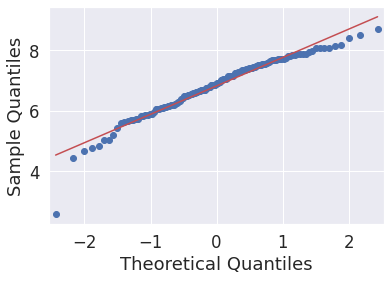


Log Likelihood: -181.54755355361053
95% Confidence Interval:(6.6670973176837025, 6.985887756943165)
p-value of chi-squared normality test= 1.429169222257369e-06
Null Hypothesis is rejected in favour of Alternate Hypothesis.
-------------------------------------------------------------------------

For Personal Freedom:


<Figure size 720x360 with 0 Axes>

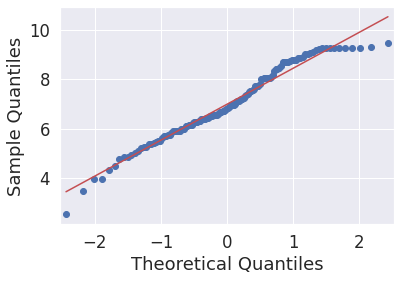


Log Likelihood: -240.01277435028194
95% Confidence Interval:(6.73505984069387, 7.228223741395684)
p-value of chi-squared normality test= 0.4614465922632768
Null Hypothesis cannot be rejected in favour of Alternate Hypothesis.
-------------------------------------------------------------------------

For Overall Human Freedom:


<Figure size 720x360 with 0 Axes>

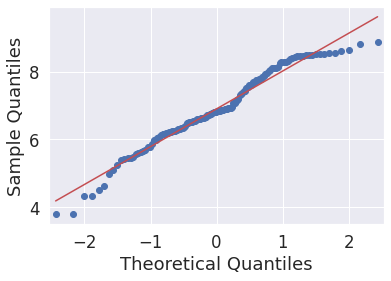


Log Likelihood: -204.6851959168952
95% Confidence Interval:(6.7145183690708725, 7.093392078690321)
p-value of chi-squared normality test= 0.2691927746439287
Null Hypothesis cannot be rejected in favour of Alternate Hypothesis.
-------------------------------------------------------------------------

For Happiness Score:


<Figure size 720x360 with 0 Axes>

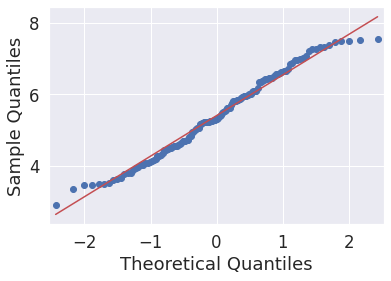


Log Likelihood: -207.02379604249785
95% Confidence Interval:(5.21614593727657, 5.601689877640695)
p-value of chi-squared normality test= 0.0024970286630853094
Null Hypothesis is rejected in favour of Alternate Hypothesis.


0
0       Personal Freedom
1  Overall Human Freedom

In [ ]:
print(len(df_happiness_2017.columns))
normal=[]
for col in df_happiness_2017.columns:
  if col != 'Region' and col != 'Population (Millions)' :
    if (df_happiness_2017[col].dtype != object):
      plt.figure(figsize=(10,5))
      sns.set(font_scale=1.5) 
      print('-------------------------------------------------------------------------')
      print("\nFor "+str(col)+":")
      sm.qqplot(df_happiness_2017[col], line='s')
      plt.show()
      
      mean=df_happiness_2017[col].mean()
      var=df_happiness_2017[col].var()
      n=len(df_happiness_2017[col])
      dif=df_happiness_2017[col]-mean
      for i in range(len(dif)):
        dif[i]=dif[i]**2
      #print(n)#print(mean)#print(var)#print(dif)
      logl=np.log(((2*np.pi*var)**(-n/2))*np.exp(-1*np.sum(dif)/(2*var)))
      print("\nLog Likelihood: "+str(logl))
      print("95% Confidence Interval:"+str(stats.norm.interval(0.95, loc=mean, scale=np.sqrt(var)/np.sqrt(n))))

      s, p = stats.normaltest(df_happiness_2017[col])
      print('p-value of chi-squared normality test= '+ str(p))

      if p<=0.05:
        print('Null Hypothesis is rejected in favour of Alternate Hypothesis.')
      else:
        print('Null Hypothesis cannot be rejected in favour of Alternate Hypothesis.')
        normal.append(col)

display(pd.DataFrame(normal))


####**Welch T-Test**: Null Hypothesis- Mean differences are zero for both sets of data, i.e. means are equal.

####**Wilcoxon Ranked Sign Test**: Null Hypothesis- Median Differences between both sets of data are zero.

In both tests, the alternative hypothesis is the exact complement of the null hypothesis. If the p-value is less than a specified value(let us say x for a confidence value of [(1-x)*100]%, i.e. 0.05 for 95% confidence, the null hypothesis is rejected in favour of the alternative hypothesis.

In [ ]:
n=len(df_happiness_2017['Region'])
print(n)
m1=df_happiness_2017['Economic Freedom'].mean()
m2=df_happiness_2017['Happiness Score'].mean()
v1=df_happiness_2017['Economic Freedom'].var()
v2=df_happiness_2017['Happiness Score'].var()
assert v1 != v2

welcht=(m1-m2)/np.sqrt((v1/n)+(v2/n))
print("\nCalculated Welch T-Test statistic = "+str(welcht))
s,p=scipy.stats.ttest_ind(df_happiness_2017['Economic Freedom'], df_happiness_2017['Happiness Score'], equal_var= False)
print('p-value for Welch T-Test = '+str(p))
#print(str(s))
if p<=0.05:
  print('Null Hypothesis for Welch T-Test is rejected in favour of Alternate Hypothesis.')
else:
  print('Null Hypothesis for Welch T-Test cannot be rejected in favour of Alternate Hypothesis.')

s,p=scipy.stats.wilcoxon(x=df_happiness_2017['Economic Freedom'], y=df_happiness_2017['Happiness Score'])
print('\np-value for Wilcoxon Ranked Sign Test = '+str(p))
if p<=0.05:
  print('Null Hypothesis for Wilcoxon Ranked Sign Test is rejected in favour of Alternate Hypothesis.')
else:
  print('Null Hypothesis for Wilcoxon Ranked Sign Test cannot be rejected in favour of Alternate Hypothesis.')

134

Calculated Welch T-Test statistic = 11.10755169045303
p-value for Welch T-Test = 1.141306236748883e-23
Null Hypothesis for Welch T-Test is rejected in favour of Alternate Hypothesis.

p-value for Wilcoxon Ranked Sign Test = 2.965094813065793e-21
Null Hypothesis for Wilcoxon Ranked Sign Test is rejected in favour of Alternate Hypothesis.


####**Correlation**

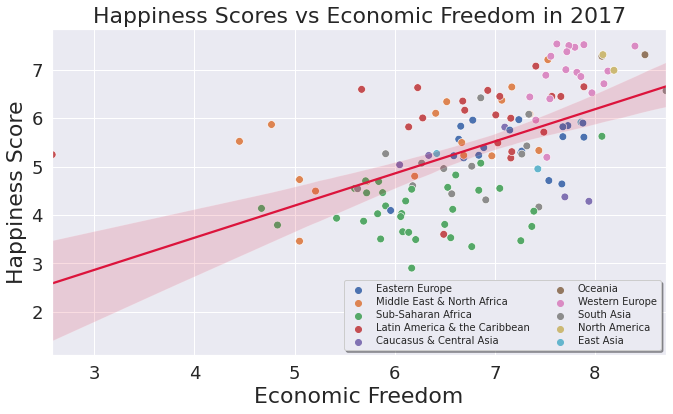

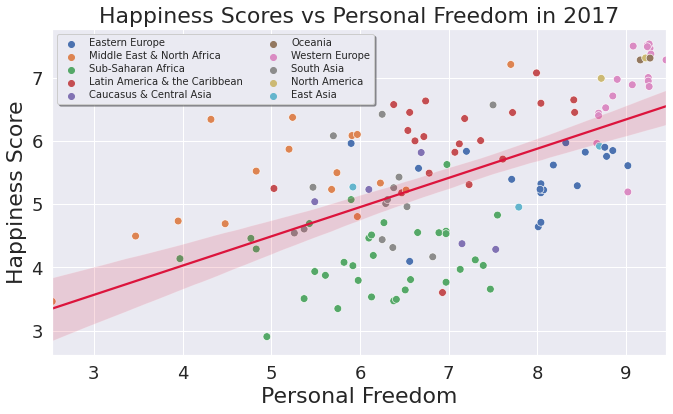

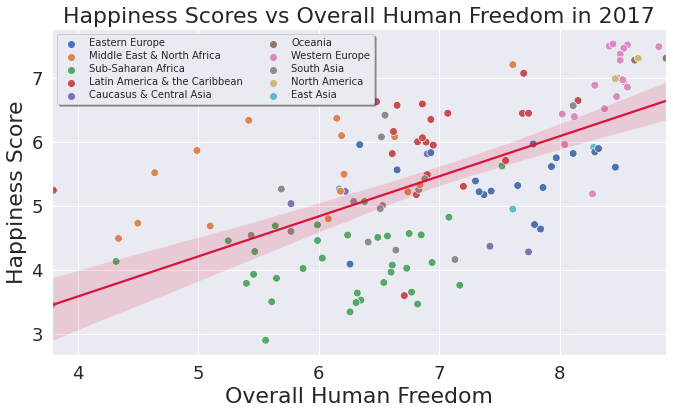

In [ ]:
for col in ["Economic Freedom",	"Personal Freedom", "Overall Human Freedom"	]:
  plt.figure(figsize = (11, 6))
  sns.scatterplot(df_happiness_2017[col], df_happiness_2017["Happiness Score"], hue = df_happiness_2017["Region"], s= 60)
  sns.regplot(df_happiness_2017[col], df_happiness_2017["Happiness Score"], scatter = False, color = "crimson")
  plt.title("Happiness Scores vs " + col + " in 2017", fontsize = 22)
  plt.xticks(fontsize = 18)
  plt.yticks(fontsize = 18)
  plt.xlabel(col, fontsize = 22)
  plt.ylabel("Happiness Score" , fontsize = 22)
  plt.legend(fontsize = 10, ncol = 2, labelspacing = 0.3, shadow = True, framealpha = 1)
  plt.show();

In [ ]:
print("For the year 2017:")
for col in ["Economic Freedom",	"Personal Freedom", "Overall Human Freedom"	]:
  corre, p = stats.pearsonr(df_happiness_2017[col], df_happiness_2017["Happiness Score"])
  print("Correlation between happiness score and " + col + " happiness score: " + str(corre))

For the year 2017:
Correlation between happiness score and Economic Freedom happiness score: 0.5490899251443685
Correlation between happiness score and Personal Freedom happiness score: 0.5919485596253999
Correlation between happiness score and Overall Human Freedom happiness score: 0.6161567486778425


In [ ]:
df_ha_reg_2017 = df_happiness_2017.groupby("Region").mean().sort_values(by = "Happiness Score")
df_ha_reg_2017

Economic Freedom  Personal Freedom  \
Region                                                              
Sub-Saharan Africa                     6.253333          6.203333   
Caucasus & Central Asia                7.026000          6.592000   
South Asia                             6.833571          6.210000   
East Asia                              7.236667          7.470000   
Eastern Europe                         7.160000          7.955789   
Middle East & North Africa             6.251176          5.225294   
Latin America & the Caribbean          6.718095          7.091429   
Western Europe                         7.758333          9.068889   
North America                          8.135000          8.970000   
Oceania                                8.285000          9.215000   

                               Overall Human Freedom  Happiness Score  
Region                                                                 
Sub-Saharan Africa                          6.228485         4.126667  
Caucasus & Central Asia                     6.810000         4.951200  
South Asia                                  6.521429         5.154571  
East Asia                                   7.353333         5.382667  
Eastern Europe                              7.558421         5.422211  
Middle East & North Africa                  5.737647         5.509176  
Latin America & the Caribbean               6.904286         5.992476  
Western Europe                              8.412778         6.895556  
North America                               8.555000         7.154500  
Oceania                                     8.750000         7.299000

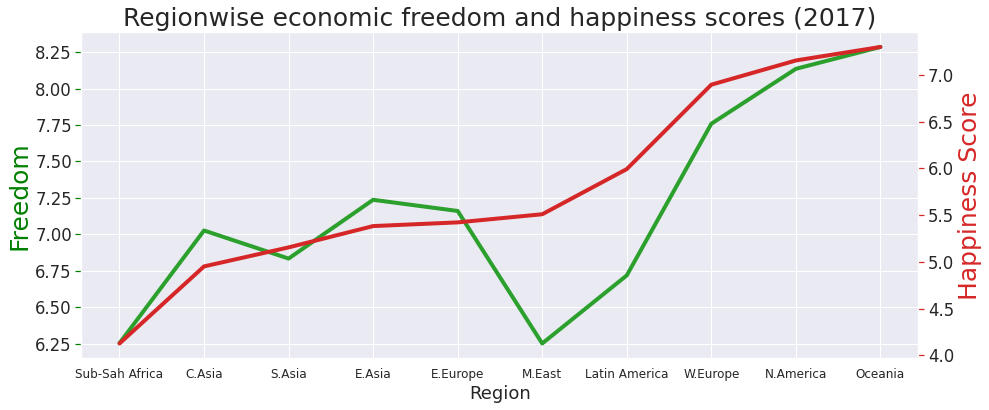

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,6))
ax1.set_title('Regionwise economic freedom and happiness scores (2017)', fontsize=25)
ax1.set_xlabel('Region', fontsize=18)
ax1.set_ylabel('Freedom', fontsize=25, color="green")
ax1.set_xticklabels(['Sub-Sah Africa', 'C.Asia', 'S.Asia',
       'E.Asia', 'E.Europe', 'M.East',
       'Latin America', 'W.Europe', 'N.America',
       'Oceania'], Fontsize = 12)
line1 = sns.lineplot(x=df_ha_reg_2017.index.values, y=df_ha_reg_2017["Economic Freedom"],linewidth = 4, color = 'tab:green')
# line2 = sns.lineplot(x=df_ha_reg_2017.index.values, y=df_ha_reg_2017["Personal Freedom"],linewidth = 4, color = 'limegreen')
# line3 = sns.lineplot(x=df_ha_reg_2017.index.values, y=df_ha_reg_2017["Overall Human Freedom"],linewidth = 4, color = 'darkgreen')
ax1.tick_params(axis='y', color = "green")
ax2 = ax1.twinx()
ax2.set_ylabel('Happiness Score', fontsize=25, color="tab:red")
ax2.set_xticklabels(['Sub-Sah Africa', 'C.Asia', 'S.Asia',
       'E.Asia', 'E.Europe', 'M.East',
       'Latin America', 'W.Europe', 'N.America',
       'Oceania'], Fontsize = 12)
ax2 = sns.lineplot(x=df_ha_reg_2017.index.values, y=df_ha_reg_2017["Happiness Score"],linewidth = 4,  color='tab:red')
ax2.tick_params(axis='y', color="tab:red")
plt.grid(False)
plt.show()

### 2015 and 2016 (Similar analysis as 2017)
####**df_happiness_2015, df_happiness_2016**

In [ ]:
display(df2015)
df2015["Happiness Score"].dtype

Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7.561         0.04884                   1.30232  1.40223   
2              7.527         0.03328                   1.32548  1.36058   
3              7.522         0.03880                   1.45900  1.33095   
4              7.427         0.03553                   1.32629  1.32261   
..               ...             ...                       ...      ...   
153            3.465         0.03464                   0.22208  0.77370   
154            3.340         0.03656                   0.28665  0.35386   
155            3.006         0.05015                   0.66320  0.47489   
156            2.905         0.08658                   0.01530  0.41587   
157            2.839         0.06727                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
153                   0.42864  0.59201                        0.55191   
154                   0.31910  0.48450                        0.08010   
155                   0.72193  0.15684                        0.18906   
156                   0.22396  0.11850                        0.10062   
157                   0.28443  0.36453                        0.10731   

     Generosity  Dystopia Residual  Year  
0       0.29678            2.51738  2015  
1       0.43630            2.70201  2015  
2       0.34139            2.49204  2015  
3       0.34699            2.46531  2015  
4       0.45811            2.45176  2015  
..          ...                ...   ...  
153     0.22628            0.67042  2015  
154     0.18260            1.63328  2015  
155     0.47179            0.32858  2015  
156     0.19727            1.83302  2015  
157     0.16681            1.56726  2015  

[158 rows x 13 columns]

dtype('float64')

In [ ]:
display(df2016)
df2016["Happiness Score"].dtype

Country                           Region  Happiness Rank  \
0        Denmark                   Western Europe               1   
1    Switzerland                   Western Europe               2   
2        Iceland                   Western Europe               3   
3         Norway                   Western Europe               4   
4        Finland                   Western Europe               5   
..           ...                              ...             ...   
152        Benin               Sub-Saharan Africa             153   
153  Afghanistan                    Southern Asia             154   
154         Togo               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   

     Happiness Score  Lower Confidence Interval  Upper Confidence Interval  \
0              7.526                      7.460                      7.592   
1              7.509                      7.428                      7.590   
2              7.501                      7.333                      7.669   
3              7.498                      7.421                      7.575   
4              7.413                      7.351                      7.475   
..               ...                        ...                        ...   
152            3.484                      3.404                      3.564   
153            3.360                      3.288                      3.432   
154            3.303                      3.192                      3.414   
155            3.069                      2.936                      3.202   
156            2.905                      2.732                      3.078   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                     1.44178  1.16374                   0.79504  0.57941   
1                     1.52733  1.14524                   0.86303  0.58557   
2                     1.42666  1.18326                   0.86733  0.56624   
3                     1.57744  1.12690                   0.79579  0.59609   
4                     1.40598  1.13464                   0.81091  0.57104   
..                        ...      ...                       ...      ...   
152                   0.39499  0.10419                   0.21028  0.39747   
153                   0.38227  0.11037                   0.17344  0.16430   
154                   0.28123  0.00000                   0.24811  0.34678   
155                   0.74719  0.14866                   0.62994  0.06912   
156                   0.06831  0.23442                   0.15747  0.04320   

     Trust (Government Corruption)  Generosity  Dystopia Residual  Year  
0                          0.44453     0.36171            2.73939  2016  
1                          0.41203     0.28083            2.69463  2016  
2                          0.14975     0.47678            2.83137  2016  
3                          0.35776     0.37895            2.66465  2016  
4                          0.41004     0.25492            2.82596  2016  
..                             ...         ...                ...   ...  
152                        0.06681     0.20180            2.10812  2016  
153                        0.07112     0.31268            2.14558  2016  
154                        0.11587     0.17517            2.13540  2016  
155                        0.17233     0.48397            0.81789  2016  
156                        0.09419     0.20290            2.10404  2016  

[157 rows x 14 columns]

dtype('float64')

Year 2015


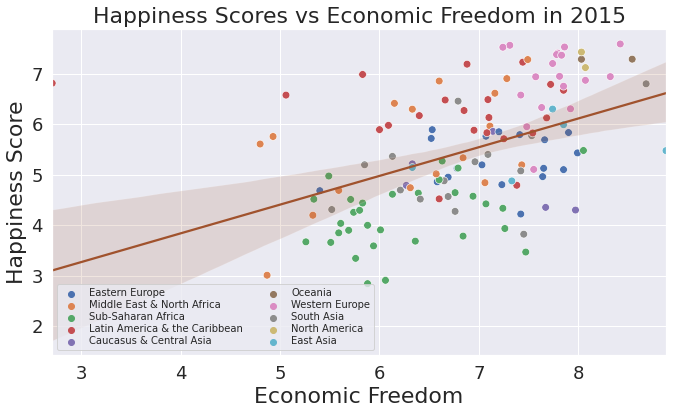

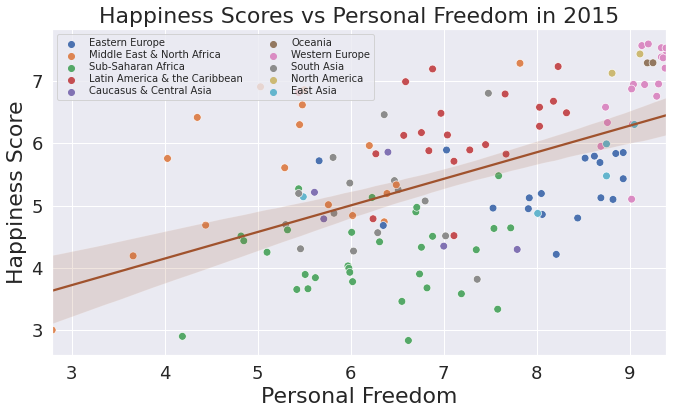

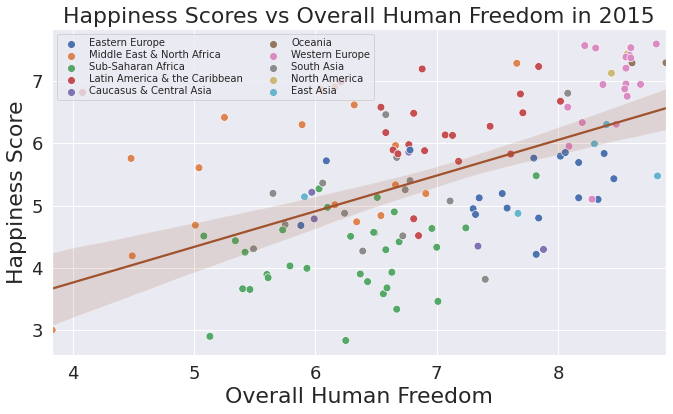

For the year 2015: 
Correlation between happiness score and Economic Freedom happiness score: 0.46223496349323057
Correlation between happiness score and Personal Freedom happiness score: 0.5379095923740596
Correlation between happiness score and Overall Human Freedom happiness score: 0.5491006838352988

 
 

Year 2016


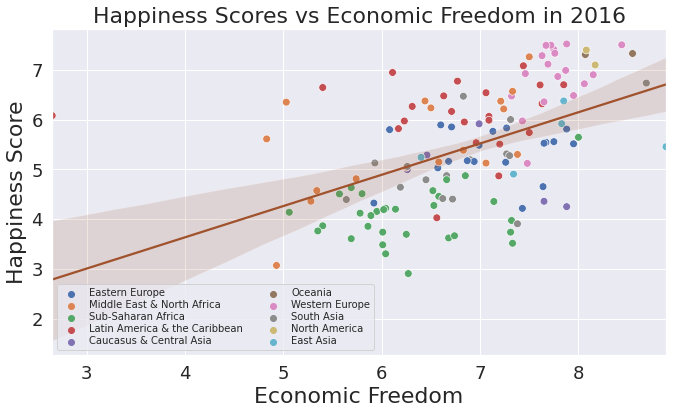

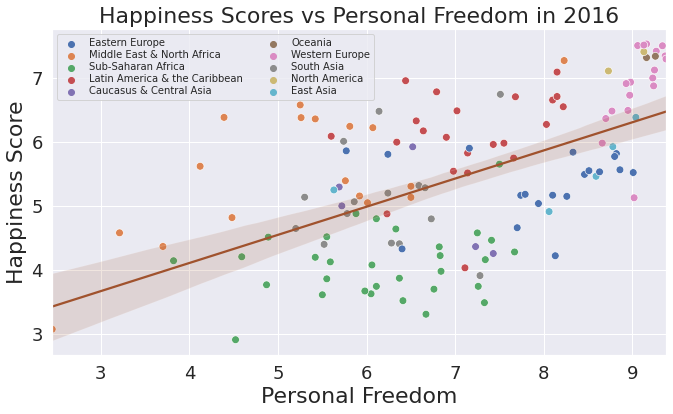

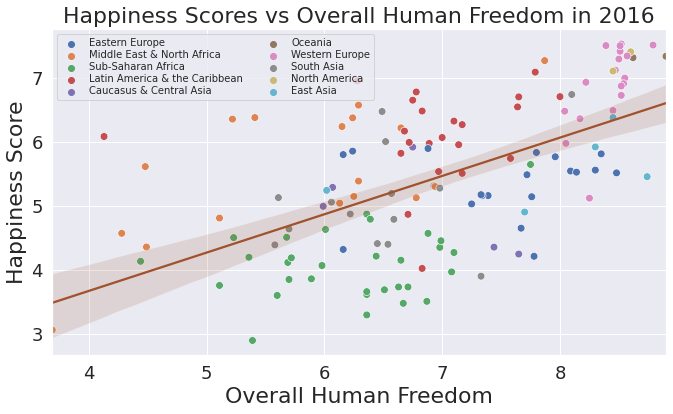

For the year 2016: 
Correlation between happiness score and Economic Freedom happiness score: 0.5030879261085257
Correlation between happiness score and Personal Freedom happiness score: 0.571751949684635
Correlation between happiness score and Overall Human Freedom happiness score: 0.5851589698007276

 
 



In [ ]:
count=0
for df_x in [df2015, df2016]:
  year = df_x["Year"][0]   #store year in a variable
  print("Year " + str(year))

  #build hfi dataframe for that year
  df_hfi_x = df_hfi.loc[df_hfi["year"] == year]
  
  #drop countries whose data is not there in 'year'.csv respectively
  drop_x = []
  countries_x = list(df_hfi_x["countries"].values.copy())
  for country in df_hfi_x["countries"].values:
    if country not in list(df_x["Country"].values):
      drop_x.append(country)
  for x in drop_x:
    countries_x.remove(x)

  #build dataframe with freedom values and happiness score for that year, for easy access 
  df_happiness_x = pd.DataFrame(columns = ["Region", "Economic Freedom", "Personal Freedom", "Overall Human Freedom", "Happiness Score"])
  for i,country in enumerate(countries_x):
    df_happiness_x.loc[country] = [df_hfi_x.loc[df_hfi_x["countries"] == country, "region"].item(),
                                    df_hfi_x.loc[df_hfi_x["countries"] == country, "ef_score"].item(), 
                                    df_hfi_x.loc[df_hfi_x["countries"] == country, "pf_score"].item(),
                                    df_hfi_x.loc[df_hfi_x["countries"] == country, "hf_score"].item(), 
                                    df_x.loc[df_x["Country"] == country,  "Happiness Score"].item()]
  

  #convert object to float datatype
  for col in ["Economic Freedom",	"Personal Freedom", "Overall Human Freedom"	]:
    df_happiness_x[col] = [float(x.replace("-","NaN")) for x in df_happiness_x[col]]                                   
  df_happiness_x = df_happiness_x.dropna(how = "any")

  #plot a regplot/scatterplot of happiness score vs each of the freedoms
  for col in ["Economic Freedom",	"Personal Freedom", "Overall Human Freedom"	]:
    plt.figure(figsize = (11, 6))
    sns.scatterplot(df_happiness_x[col], df_happiness_x["Happiness Score"], hue = df_happiness_x["Region"], s= 60)
    sns.regplot(df_happiness_x[col], df_happiness_x["Happiness Score"], scatter = False, color = "sienna")
    plt.title("Happiness Scores vs " + col + " in "+ str(year), fontsize = 22)
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.xlabel(col, fontsize = 22)
    plt.ylabel("Happiness Score" , fontsize = 22)
    plt.legend(fontsize = 10, labelspacing = 0.2, ncol = 2)
    plt.show();

  #correlation coefficients
  print("For the year " + str(year) + ": ")
  for col in ["Economic Freedom",	"Personal Freedom", "Overall Human Freedom"	]:
    corre_x, p = stats.pearsonr(df_happiness_x[col], df_happiness_x["Happiness Score"])
    print("Correlation between happiness score and " + col + " happiness score: " + str(corre_x))
  if count==0:
    df_happiness_2015=df_happiness_x
  else:
    df_happiness_2016=df_happiness_x
  count=1
  print("\n \n \n")

####2016

In [ ]:
display(df_happiness_2016)

Region  Economic Freedom  Personal Freedom  \
Albania                   Eastern Europe              7.64              7.70   
Algeria       Middle East & North Africa              5.03              5.42   
Angola                Sub-Saharan Africa              5.40              6.37   
Argentina  Latin America & the Caribbean              5.40              8.10   
Armenia          Caucasus & Central Asia              7.65              7.23   
...                                  ...               ...               ...   
Uruguay    Latin America & the Caribbean              7.06              8.22   
Venezuela  Latin America & the Caribbean              2.65              5.60   
Vietnam                       South Asia              6.26              5.86   
Zambia                Sub-Saharan Africa              6.66              6.11   
Zimbabwe              Sub-Saharan Africa              6.02              5.42   

           Overall Human Freedom  Happiness Score  
Albania                     7.67            4.655  
Algeria                     5.22            6.355  
Angola                      5.89            3.866  
Argentina                   6.75            6.650  
Armenia                     7.44            4.360  
...                          ...              ...  
Uruguay                     7.64            6.545  
Venezuela                   4.13            6.084  
Vietnam                     6.06            5.061  
Zambia                      6.39            4.795  
Zimbabwe                    5.72            4.193  

[136 rows x 5 columns]

#####**Null Hypothesis**: Following variables are from a normal distribution.
#####**Alternate Hypothesis**: Following Variables are not from a normal distribution.


#####A higher log likelihood(less negative) implies a higher degree of 'normality' of the distribution.
#####A QQ-plot closely following the straight lines shown would imply a higher degree of 'normality'.
#####For a chi-squared goodness-of-fit(normality) test, if the p-value is less than a specified value(let us say x for a confidence value of [(1-x)*100]%), i.e. 0.05 for 95% confidence, the null hypothesis is rejected in favour of the alternative hypothesis.

5
-------------------------------------------------------------------------

For Economic Freedom:


<Figure size 720x360 with 0 Axes>

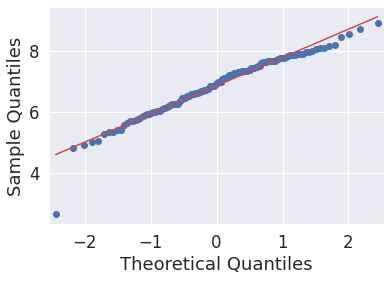


Log Likelihood: -181.92323817145427
95% Confidence Interval:(6.69896709821193, 7.0100034900233625)
p-value of chi-squared normality test= 1.5948481037726183e-05
Null Hypothesis is rejected in favour of Alternate Hypothesis.
-------------------------------------------------------------------------

For Personal Freedom:


<Figure size 720x360 with 0 Axes>

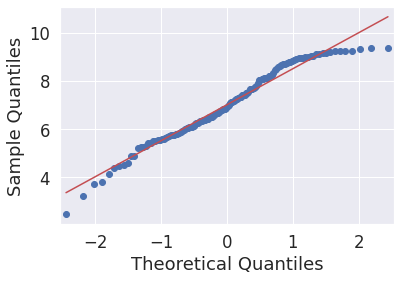


Log Likelihood: -248.1159343382628
95% Confidence Interval:(6.764993389040289, 7.271036022724412)
p-value of chi-squared normality test= 0.2284392817653671
Null Hypothesis cannot be rejected in favour of Alternate Hypothesis.
-------------------------------------------------------------------------

For Overall Human Freedom:


<Figure size 720x360 with 0 Axes>

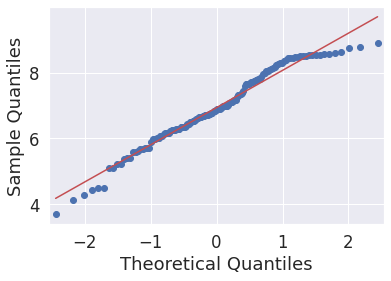


Log Likelihood: -209.54791216155726
95% Confidence Interval:(6.74577910943573, 7.126867949387809)
p-value of chi-squared normality test= 0.23095623573337687
Null Hypothesis cannot be rejected in favour of Alternate Hypothesis.
-------------------------------------------------------------------------

For Happiness Score:


<Figure size 720x360 with 0 Axes>

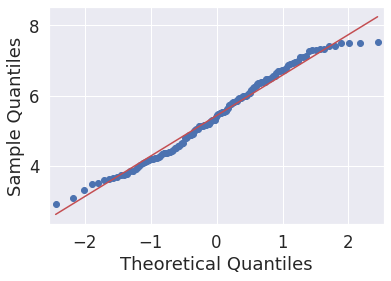


Log Likelihood: -212.3668695707974
95% Confidence Interval:(5.2365677708286995, 5.625638111524244)
p-value of chi-squared normality test= 0.0004401101938569137
Null Hypothesis is rejected in favour of Alternate Hypothesis.


0
0       Personal Freedom
1  Overall Human Freedom

In [ ]:
print(len(df_happiness_2016.columns))
normal=[]
for col in df_happiness_2016.columns:
  if col != 'Region' and col != 'Population (Millions)' :
    if (df_happiness_2016[col].dtype != object):
      plt.figure(figsize=(10,5))
      sns.set(font_scale=1.5) 
      print('-------------------------------------------------------------------------')
      print("\nFor "+str(col)+":")
      sm.qqplot(df_happiness_2016[col], line='s')
      plt.show()
      
      mean=df_happiness_2016[col].mean()
      var=df_happiness_2016[col].var()
      n=len(df_happiness_2016[col])
      dif=df_happiness_2016[col]-mean
      for i in range(len(dif)):
        dif[i]=dif[i]**2
      #print(n)#print(mean)#print(var)#print(dif)
      logl=np.log(((2*np.pi*var)**(-n/2))*np.exp(-1*np.sum(dif)/(2*var)))
      print("\nLog Likelihood: "+str(logl))
      print("95% Confidence Interval:"+str(stats.norm.interval(0.95, loc=mean, scale=np.sqrt(var)/np.sqrt(n))))

      s, p = stats.normaltest(df_happiness_2016[col])
      print('p-value of chi-squared normality test= '+ str(p))

      if p<=0.05:
        print('Null Hypothesis is rejected in favour of Alternate Hypothesis.')
      else:
        print('Null Hypothesis cannot be rejected in favour of Alternate Hypothesis.')
        normal.append(col)

display(pd.DataFrame(normal))


#####**Welch T-Test**: Null Hypothesis- Mean differences are zero for both sets of data, i.e. means are equal.

#####**Wilcoxon Ranked Sign Test**: Null Hypothesis- Median Differences between both sets of data are zero.

In both tests, the alternative hypothesis is the exact complement of the null hypothesis. If the p-value is less than a specified value(let us say x for a confidence value of [(1-x)*100]%, i.e. 0.05 for 95% confidence, the null hypothesis is rejected in favour of the alternative hypothesis.

In [ ]:
n=len(df_happiness_2016['Region'])
print(n)
m1=df_happiness_2016['Economic Freedom'].mean()
m2=df_happiness_2016['Happiness Score'].mean()
v1=df_happiness_2016['Economic Freedom'].var()
v2=df_happiness_2016['Happiness Score'].var()
assert v1 != v2

welcht=(m1-m2)/np.sqrt((v1/n)+(v2/n))
print("\nCalculated Welch T-Test statistic = "+str(welcht))
s,p=scipy.stats.ttest_ind(df_happiness_2016['Economic Freedom'], df_happiness_2016['Happiness Score'], equal_var= False)
print('p-value for Welch T-Test = '+str(p))
#print(str(s))
if p<=0.05:
  print('Null Hypothesis for Welch T-Test is rejected in favour of Alternate Hypothesis.')
else:
  print('Null Hypothesis for Welch T-Test cannot be rejected in favour of Alternate Hypothesis.')

s,p=scipy.stats.wilcoxon(x=df_happiness_2016['Economic Freedom'], y=df_happiness_2016['Happiness Score'])
print('\np-value for Wilcoxon Ranked Sign Test = '+str(p))
if p<=0.05:
  print('Null Hypothesis for Wilcoxon Ranked Sign Test is rejected in favour of Alternate Hypothesis.')
else:
  print('Null Hypothesis for Wilcoxon Ranked Sign Test cannot be rejected in favour of Alternate Hypothesis.')

136

Calculated Welch T-Test statistic = 11.201323280155908
p-value for Welch T-Test = 5.495367444959867e-24
Null Hypothesis for Welch T-Test is rejected in favour of Alternate Hypothesis.

p-value for Wilcoxon Ranked Sign Test = 3.45759666409327e-21
Null Hypothesis for Wilcoxon Ranked Sign Test is rejected in favour of Alternate Hypothesis.


In [ ]:
########################################################################################################################################################

####2015

In [ ]:
display(df_happiness_2015)

Region  Economic Freedom  Personal Freedom  \
Albania                   Eastern Europe              7.64              7.53   
Algeria       Middle East & North Africa              4.80              5.29   
Angola                Sub-Saharan Africa              5.61              5.97   
Argentina  Latin America & the Caribbean              5.06              8.03   
Armenia          Caucasus & Central Asia              7.67              7.00   
...                                  ...               ...               ...   
Uruguay    Latin America & the Caribbean              7.09              8.32   
Venezuela  Latin America & the Caribbean              2.71              5.44   
Vietnam                       South Asia              6.13              5.99   
Zambia                Sub-Saharan Africa              6.79              6.23   
Zimbabwe              Sub-Saharan Africa              6.13              5.32   

           Overall Human Freedom  Happiness Score  
Albania                     7.58            4.959  
Algeria                     5.04            5.605  
Angola                      5.79            4.033  
Argentina                   6.54            6.574  
Armenia                     7.34            4.350  
...                          ...              ...  
Uruguay                     7.71            6.485  
Venezuela                   4.08            6.810  
Vietnam                     6.06            5.360  
Zambia                      6.51            5.129  
Zimbabwe                    5.73            4.610  

[134 rows x 5 columns]

#####**Null Hypothesis**: Following variables are from a normal distribution.
#####**Alternate Hypothesis**: Following Variables are not from a normal distribution.


#####A higher log likelihood(less negative) implies a higher degree of 'normality' of the distribution.
#####A QQ-plot closely following the straight lines shown would imply a higher degree of 'normality'.
#####For a chi-squared goodness-of-fit(normality) test, if the p-value is less than a specified value(let us say x for a confidence value of [(1-x)*100]%), i.e. 0.05 for 95% confidence, the null hypothesis is rejected in favour of the alternative hypothesis.

5
-------------------------------------------------------------------------

For Economic Freedom:


<Figure size 720x360 with 0 Axes>

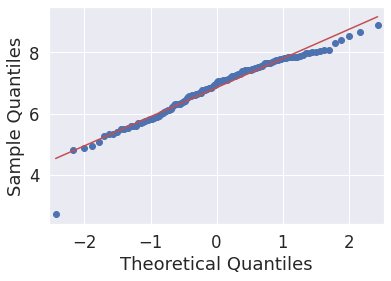


Log Likelihood: -183.22671393185286
95% Confidence Interval:(6.690087361472425, 7.012897713154439)
p-value of chi-squared normality test= 0.00010570220340147768
Null Hypothesis is rejected in favour of Alternate Hypothesis.
-------------------------------------------------------------------------

For Personal Freedom:


<Figure size 720x360 with 0 Axes>

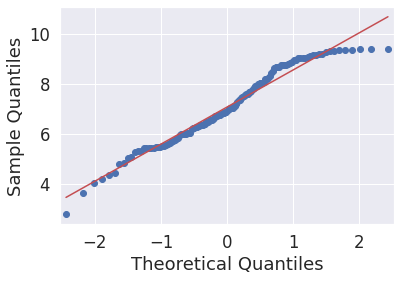


Log Likelihood: -242.54813757399373
95% Confidence Interval:(6.8206484478988445, 7.323232149116083)
p-value of chi-squared normality test= 0.07208845161905493
Null Hypothesis cannot be rejected in favour of Alternate Hypothesis.
-------------------------------------------------------------------------

For Overall Human Freedom:


<Figure size 720x360 with 0 Axes>

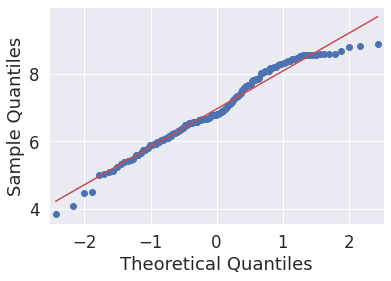


Log Likelihood: -205.91625692079006
95% Confidence Interval:(6.771128198490454, 7.153498667181185)
p-value of chi-squared normality test= 0.20339866410224583
Null Hypothesis cannot be rejected in favour of Alternate Hypothesis.
-------------------------------------------------------------------------

For Happiness Score:


<Figure size 720x360 with 0 Axes>

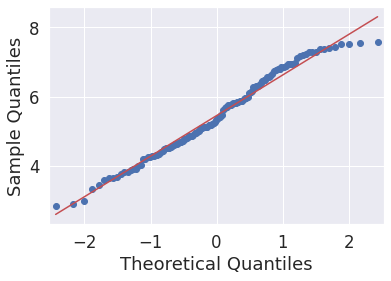


Log Likelihood: -211.13803454720357
95% Confidence Interval:(5.259232425576164, 5.656797425170105)
p-value of chi-squared normality test= 0.006280515593615768
Null Hypothesis is rejected in favour of Alternate Hypothesis.


0
0       Personal Freedom
1  Overall Human Freedom

In [ ]:
print(len(df_happiness_2015.columns))
normal=[]
for col in df_happiness_2015.columns:
  if col != 'Region' and col != 'Population (Millions)' :
    if (df_happiness_2015[col].dtype != object):
      plt.figure(figsize=(10,5))
      sns.set(font_scale=1.5) 
      print('-------------------------------------------------------------------------')
      print("\nFor "+str(col)+":")
      sm.qqplot(df_happiness_2015[col], line='s')
      plt.show()
      
      mean=df_happiness_2015[col].mean()
      var=df_happiness_2015[col].var()
      n=len(df_happiness_2015[col])
      dif=df_happiness_2015[col]-mean
      for i in range(len(dif)):
        dif[i]=dif[i]**2
      #print(n)#print(mean)#print(var)#print(dif)
      logl=np.log(((2*np.pi*var)**(-n/2))*np.exp(-1*np.sum(dif)/(2*var)))
      print("\nLog Likelihood: "+str(logl))
      print("95% Confidence Interval:"+str(stats.norm.interval(0.95, loc=mean, scale=np.sqrt(var)/np.sqrt(n))))

      s, p = stats.normaltest(df_happiness_2015[col])
      print('p-value of chi-squared normality test= '+ str(p))

      if p<=0.05:
        print('Null Hypothesis is rejected in favour of Alternate Hypothesis.')
      else:
        print('Null Hypothesis cannot be rejected in favour of Alternate Hypothesis.')
        normal.append(col)

display(pd.DataFrame(normal))


#####**Welch T-Test**: Null Hypothesis- Mean differences are zero for both sets of data, i.e. means are equal.

#####**Wilcoxon Ranked Sign Test**: Null Hypothesis- Median Differences between both sets of data are zero.

In both tests, the alternative hypothesis is the exact complement of the null hypothesis. If the p-value is less than a specified value(let us say x for a confidence value of [(1-x)*100]%, i.e. 0.05 for 95% confidence, the null hypothesis is rejected in favour of the alternative hypothesis.

In [ ]:
n=len(df_happiness_2015['Region'])
print(n)
m1=df_happiness_2015['Economic Freedom'].mean()
m2=df_happiness_2015['Happiness Score'].mean()
v1=df_happiness_2015['Economic Freedom'].var()
v2=df_happiness_2015['Happiness Score'].var()
assert v1 != v2

welcht=(m1-m2)/np.sqrt((v1/n)+(v2/n))
print("\nCalculated Welch T-Test statistic = "+str(welcht))
s,p=scipy.stats.ttest_ind(df_happiness_2015['Economic Freedom'], df_happiness_2015['Happiness Score'], equal_var= False)
print('p-value for Welch T-Test = '+str(p))
#print(str(s))
if p<=0.05:
  print('Null Hypothesis for Welch T-Test is rejected in favour of Alternate Hypothesis.')
else:
  print('Null Hypothesis for Welch T-Test cannot be rejected in favour of Alternate Hypothesis.')

s,p=scipy.stats.wilcoxon(x=df_happiness_2015['Economic Freedom'], y=df_happiness_2015['Happiness Score'])
print('\np-value for Wilcoxon Ranked Sign Test = '+str(p))
if p<=0.05:
  print('Null Hypothesis for Wilcoxon Ranked Sign Test is rejected in favour of Alternate Hypothesis.')
else:
  print('Null Hypothesis for Wilcoxon Ranked Sign Test cannot be rejected in favour of Alternate Hypothesis.')

134

Calculated Welch T-Test statistic = 10.66616671742784
p-value for Welch T-Test = 3.308880683892037e-22
Null Hypothesis for Welch T-Test is rejected in favour of Alternate Hypothesis.

p-value for Wilcoxon Ranked Sign Test = 2.5247361930713156e-20
Null Hypothesis for Wilcoxon Ranked Sign Test is rejected in favour of Alternate Hypothesis.


In [ ]:
########################################################################################################################################################

####**Region**

Economic Freedom  Personal Freedom  Overall Human Freedom  \
Region                                                                      
Sub-Sah Africa          6.246129          6.228065               6.237097   
C.Asia                  7.076000          6.502000               6.790000   
S.Asia                  6.809333          6.276000               6.543333   
E.Europe                7.141667          8.066667               7.605000   
East Asia               7.626000          8.010000               7.820000   
M.East                  6.344118          5.356471               5.850000   
Latin America           6.674286          7.174762               6.925714   
W.Europe                7.755000          9.143333               8.450556   
N.America               8.050000          8.960000               8.505000   
Oceania                 8.285000          9.220000               8.750000   

                Happiness Score  
Region                           
Sub-Sah Africa         4.176581  
C.Asia                 4.900000  
S.Asia                 5.089867  
E.Europe               5.275278  
East Asia              5.554600  
M.East                 5.568765  
Latin America          6.204667  
W.Europe               6.902278  
N.America              7.273000  
Oceania                7.285000

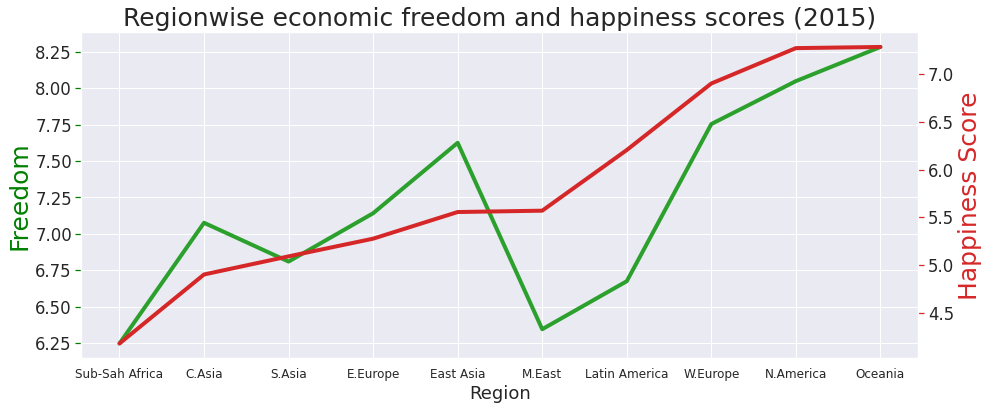

Economic Freedom  Personal Freedom  Overall Human Freedom  \
Region                                                                      
Sub-Sah Africa          6.273548          6.170323               6.222258   
C.Asia                  7.048000          6.518000               6.780000   
S.Asia                  6.810000          6.213333               6.511333   
E.Europe                7.104737          7.928947               7.515789   
M.East                  6.321765          5.240000               5.780588   
East Asia               7.662000          8.020000               7.842000   
Latin America           6.681818          7.175455               6.930000   
W.Europe                7.761111          9.078333               8.420556   
N.America               8.125000          8.930000               8.525000   
Oceania                 8.310000          9.210000               8.760000   

                Happiness Score  
Region                           
Sub-Sah Africa         4.079839  
C.Asia                 4.963600  
S.Asia                 5.108867  
E.Europe               5.341316  
M.East                 5.521000  
East Asia              5.582000  
Latin America          6.102182  
W.Europe               6.891611  
N.America              7.254000  
Oceania                7.323500

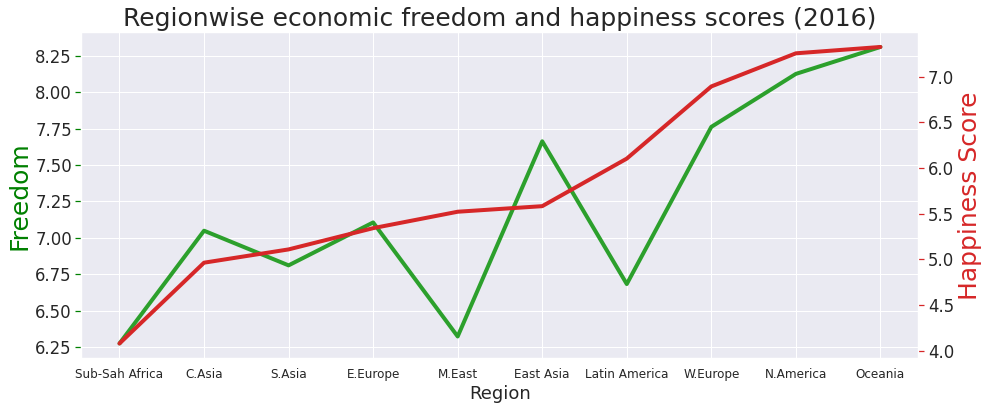

In [ ]:
count=0
for df_happiness_y in [df_happiness_2015, df_happiness_2016]:

  df_ha_reg_y = df_happiness_y.groupby("Region").mean().sort_values(by = "Happiness Score")
  df_ha_reg_y = df_ha_reg_y.rename(index = {"Sub-Saharan Africa" : "Sub-Sah Africa", "Caucasus & Central Asia": "C.Asia",
                                            "South Asia":"S.Asia", "Middle East & North Africa": "M.East",
                                            "Eastern Europe": "E.Europe", "Eastern Asia": "E.Asia",
                                            "Western America":"W.America", "Western Europe": "W.Europe", "North America": "N.America",                                         
                                            "Latin America & the Caribbean" : "Latin America"})
  display(df_ha_reg_y)
  fig, ax1 = plt.subplots(figsize=(15,6))
  if count==0:
    ax1.set_title('Regionwise economic freedom and happiness scores (2015)', fontsize=25)
  else:
    ax1.set_title('Regionwise economic freedom and happiness scores (2016)', fontsize=25)
  ax1.set_xlabel('Region', fontsize=18)
  ax1.set_ylabel('Freedom', fontsize=25, color="green")
  ax1.set_xticklabels(df_ha_reg_y.index.values, Fontsize = 12)
  line1 = sns.lineplot(x=df_ha_reg_y.index.values, y=df_ha_reg_y["Economic Freedom"],linewidth = 4, color = 'tab:green')
  # line2 = sns.lineplot(x=df_ha_reg_y.index.values, y=df_ha_reg_y["Personal Freedom"],linewidth = 4, color = 'limegreen')
  # line3 = sns.lineplot(x=df_ha_reg_y.index.values, y=df_ha_reg_y["Overall Human Freedom"],linewidth = 4, color = 'darkgreen')
  ax1.tick_params(axis='y', color = "green")
  ax2 = ax1.twinx()
  ax2.set_ylabel('Happiness Score', fontsize=25, color="tab:red")
  ax2.set_xticklabels(df_ha_reg_y.index.values, Fontsize = 12)
  ax2 = sns.lineplot(x=df_ha_reg_y.index.values, y=df_ha_reg_y["Happiness Score"],linewidth = 4,  color='tab:red')
  ax2.tick_params(axis='y', color='tab:red')
  plt.grid(False)
  plt.show()
  count=count+1

##All Years(2018 Economic Freedom Index Data unavailable, not considered)(Regression, Modelling)
###**df_eco_201x, df_eco(year and region OHE), df_eco_noyear(only region OHE)**

###Concatenating the smaller dataframes to make a fuller dataset.

In [ ]:
for i,df_z0 in enumerate([df_happiness_2015, df_happiness_2016, df_happiness_2017, df_happiness]):
  add = 0
  df_z = df_z0.copy()
  if i == 3:   #if dataframe is of 2019
    add = 1    
  else:   #make region names same in all the dataframes
    df_z = df_z.replace({"Eastern Europe": "Europe", "Middle East & North Africa": "Middle East and North Africa",
                            "Latin America & the Caribbean": "Americas", "Caucasus & Central Asia": "Asia-Pacific",
                            "Oceania": "Asia-Pacific","Western Europe":"Europe", "South Asia": "Asia-Pacific",
                            "North America": "Americas", "East Asia": "Asia-Pacific"
                            })
  df_z["Year"] = [2015 + i + add]*len(df_z.index.values)   # add = 1 if the year is 2019 (i = 3), otherwise 0
  # display(df_z)
  df_eco_x = df_z[["Region", "Economic Freedom", "Happiness Score", "Year"]]
  
  if i == 0:
    df_eco_2015 = df_eco_x.copy()
  elif i == 1:
    df_eco_2016 = df_eco_x.copy()
  elif i == 2:
    df_eco_2017 = df_eco_x.copy()
  else:
    df_eco_2019 = df_eco_x.copy()
  
df_eco_2019 = df_eco_2019.sort_index()
display(df_eco_2015, df_eco_2016, df_eco_2017, df_eco_2019)

Region  Economic Freedom  Happiness Score  \
Albania                          Europe              7.64            4.959   
Algeria    Middle East and North Africa              4.80            5.605   
Angola               Sub-Saharan Africa              5.61            4.033   
Argentina                      Americas              5.06            6.574   
Armenia                    Asia-Pacific              7.67            4.350   
...                                 ...               ...              ...   
Uruguay                        Americas              7.09            6.485   
Venezuela                      Americas              2.71            6.810   
Vietnam                    Asia-Pacific              6.13            5.360   
Zambia               Sub-Saharan Africa              6.79            5.129   
Zimbabwe             Sub-Saharan Africa              6.13            4.610   

           Year  
Albania    2015  
Algeria    2015  
Angola     2015  
Argentina  2015  
Armenia    2015  
...         ...  
Uruguay    2015  
Venezuela  2015  
Vietnam    2015  
Zambia     2015  
Zimbabwe   2015  

[134 rows x 4 columns]

Region  Economic Freedom  Happiness Score  \
Albania                          Europe              7.64            4.655   
Algeria    Middle East and North Africa              5.03            6.355   
Angola               Sub-Saharan Africa              5.40            3.866   
Argentina                      Americas              5.40            6.650   
Armenia                    Asia-Pacific              7.65            4.360   
...                                 ...               ...              ...   
Uruguay                        Americas              7.06            6.545   
Venezuela                      Americas              2.65            6.084   
Vietnam                    Asia-Pacific              6.26            5.061   
Zambia               Sub-Saharan Africa              6.66            4.795   
Zimbabwe             Sub-Saharan Africa              6.02            4.193   

           Year  
Albania    2016  
Algeria    2016  
Angola     2016  
Argentina  2016  
Armenia    2016  
...         ...  
Uruguay    2016  
Venezuela  2016  
Vietnam    2016  
Zambia     2016  
Zimbabwe   2016  

[136 rows x 4 columns]

Region  Economic Freedom  Happiness Score  \
Albania                          Europe              7.67            4.644   
Algeria    Middle East and North Africa              4.77            5.872   
Angola               Sub-Saharan Africa              4.83            3.795   
Argentina                      Americas              5.67            6.599   
Armenia                    Asia-Pacific              7.70            4.376   
...                                 ...               ...              ...   
Uruguay                        Americas              7.05            6.454   
Venezuela                      Americas              2.58            5.250   
Vietnam                    Asia-Pacific              6.27            5.074   
Zambia               Sub-Saharan Africa              6.84            4.514   
Zimbabwe             Sub-Saharan Africa              5.69            3.875   

           Year  
Albania    2017  
Algeria    2017  
Angola     2017  
Argentina  2017  
Armenia    2017  
...         ...  
Uruguay    2017  
Venezuela  2017  
Vietnam    2017  
Zambia     2017  
Zimbabwe   2017  

[134 rows x 4 columns]

Region  Economic Freedom  Happiness Score  \
Albania                          Europe              6.65            4.719   
Algeria    Middle East and North Africa              4.62            5.211   
Argentina                      Americas              5.22            6.086   
Armenia                          Europe              6.77            4.559   
Australia                  Asia-Pacific              8.09            7.228   
...                                 ...               ...              ...   
Uruguay                        Americas              6.86            6.293   
Venezuela                      Americas              2.59            4.707   
Vietnam                    Asia-Pacific              5.53            5.175   
Zambia               Sub-Saharan Africa              5.36            4.107   
Zimbabwe             Sub-Saharan Africa              4.04            3.663   

           Year  
Albania    2019  
Algeria    2019  
Argentina  2019  
Armenia    2019  
Australia  2019  
...         ...  
Uruguay    2019  
Venezuela  2019  
Vietnam    2019  
Zambia     2019  
Zimbabwe   2019  

[127 rows x 4 columns]

In [ ]:
df_eco = pd.concat([df_eco_2015, df_eco_2016, df_eco_2017, df_eco_2019]).replace({"Middle East and North Africa": "MENA" ,
                                                                                  "Sub-Saharan Africa": "SSA",
                                                                                  "Europe": "E", "Americas": "Am",
                                                                                  "Asia-Pacific": "AP" })
df_eco

Region  Economic Freedom  Happiness Score  Year
Albania        E              7.64            4.959  2015
Algeria     MENA              4.80            5.605  2015
Angola       SSA              5.61            4.033  2015
Argentina     Am              5.06            6.574  2015
Armenia       AP              7.67            4.350  2015
...          ...               ...              ...   ...
Uruguay       Am              6.86            6.293  2019
Venezuela     Am              2.59            4.707  2019
Vietnam       AP              5.53            5.175  2019
Zambia       SSA              5.36            4.107  2019
Zimbabwe     SSA              4.04            3.663  2019

[531 rows x 4 columns]

In [ ]:
df_happiness.Region.unique()

array(['Asia-Pacific', 'Europe', 'Americas', 'Sub-Saharan Africa',
       'Middle East and North Africa'], dtype=object)

In [ ]:
df_happiness_2017.Region.unique()

array(['Eastern Europe', 'Middle East & North Africa',
       'Sub-Saharan Africa', 'Latin America & the Caribbean',
       'Caucasus & Central Asia', 'Oceania', 'Western Europe',
       'South Asia', 'North America', 'East Asia'], dtype=object)

In [ ]:
df_happiness_2016.Region.unique()

array(['Eastern Europe', 'Middle East & North Africa',
       'Sub-Saharan Africa', 'Latin America & the Caribbean',
       'Caucasus & Central Asia', 'Oceania', 'Western Europe',
       'South Asia', 'North America', 'East Asia'], dtype=object)

In [ ]:
df_happiness_2015.Region.unique()

array(['Eastern Europe', 'Middle East & North Africa',
       'Sub-Saharan Africa', 'Latin America & the Caribbean',
       'Caucasus & Central Asia', 'Oceania', 'Western Europe',
       'South Asia', 'North America', 'East Asia'], dtype=object)

In [ ]:
df_eco.Region.unique()

array(['E', 'MENA', 'SSA', 'Am', 'AP'], dtype=object)

In [ ]:
#one hot encoding of the categorical variable "Region"
df_region = pd.get_dummies(df_eco.Region, prefix = "Region")
df_year = pd.get_dummies(df_eco.Year, prefix = "Year")
display(df_region, df_year)
df_eco=((df_eco-df_eco.mean())/(df_eco.std())).drop(['Region','Year'],axis=1)
display(df_eco)

Region_AP  Region_Am  Region_E  Region_MENA  Region_SSA
Albania            0          0         1            0           0
Algeria            0          0         0            1           0
Angola             0          0         0            0           1
Argentina          0          1         0            0           0
Armenia            1          0         0            0           0
...              ...        ...       ...          ...         ...
Uruguay            0          1         0            0           0
Venezuela          0          1         0            0           0
Vietnam            1          0         0            0           0
Zambia             0          0         0            0           1
Zimbabwe           0          0         0            0           1

[531 rows x 5 columns]

Year_2015  Year_2016  Year_2017  Year_2019
Albania            1          0          0          0
Algeria            1          0          0          0
Angola             1          0          0          0
Argentina          1          0          0          0
Armenia            1          0          0          0
...              ...        ...        ...        ...
Uruguay            0          0          0          1
Venezuela          0          0          0          1
Vietnam            0          0          0          1
Zambia             0          0          0          1
Zimbabwe           0          0          0          1

[531 rows x 4 columns]

Economic Freedom  Happiness Score
Albania            0.942415        -0.431733
Algeria           -1.924468         0.135840
Angola            -1.106800        -1.245313
Argentina         -1.662006         0.987200
Armenia            0.972699        -0.966798
...                     ...              ...
Uruguay            0.155032         0.740314
Venezuela         -4.155387        -0.653140
Vietnam           -1.187558        -0.241956
Zambia            -1.359167        -1.180297
Zimbabwe          -2.691662        -1.570394

[531 rows x 2 columns]

In [ ]:
df_eco[df_region.columns.values] = df_region
df_eco_noyear=df_eco
display(df_eco_noyear)
df_eco[df_year.columns.values] = df_year
df_eco=df_eco
display(df_eco)

Economic Freedom  Happiness Score  Region_AP  Region_Am  Region_E  \
Albania            0.942415        -0.431733          0          0         1   
Algeria           -1.924468         0.135840          0          0         0   
Angola            -1.106800        -1.245313          0          0         0   
Argentina         -1.662006         0.987200          0          1         0   
Armenia            0.972699        -0.966798          1          0         0   
...                     ...              ...        ...        ...       ...   
Uruguay            0.155032         0.740314          0          1         0   
Venezuela         -4.155387        -0.653140          0          1         0   
Vietnam           -1.187558        -0.241956          1          0         0   
Zambia            -1.359167        -1.180297          0          0         0   
Zimbabwe          -2.691662        -1.570394          0          0         0   

           Region_MENA  Region_SSA  
Albania              0           0  
Algeria              1           0  
Angola               0           1  
Argentina            0           0  
Armenia              0           0  
...                ...         ...  
Uruguay              0           0  
Venezuela            0           0  
Vietnam              0           0  
Zambia               0           1  
Zimbabwe             0           1  

[531 rows x 7 columns]

Economic Freedom  Happiness Score  Region_AP  Region_Am  Region_E  \
Albania            0.942415        -0.431733          0          0         1   
Algeria           -1.924468         0.135840          0          0         0   
Angola            -1.106800        -1.245313          0          0         0   
Argentina         -1.662006         0.987200          0          1         0   
Armenia            0.972699        -0.966798          1          0         0   
...                     ...              ...        ...        ...       ...   
Uruguay            0.155032         0.740314          0          1         0   
Venezuela         -4.155387        -0.653140          0          1         0   
Vietnam           -1.187558        -0.241956          1          0         0   
Zambia            -1.359167        -1.180297          0          0         0   
Zimbabwe          -2.691662        -1.570394          0          0         0   

           Region_MENA  Region_SSA  Year_2015  Year_2016  Year_2017  Year_2019  
Albania              0           0          1          0          0          0  
Algeria              1           0          1          0          0          0  
Angola               0           1          1          0          0          0  
Argentina            0           0          1          0          0          0  
Armenia              0           0          1          0          0          0  
...                ...         ...        ...        ...        ...        ...  
Uruguay              0           0          0          0          0          1  
Venezuela            0           0          0          0          0          1  
Vietnam              0           0          0          0          0          1  
Zambia               0           1          0          0          0          1  
Zimbabwe             0           1          0          0          0          1  

[531 rows x 11 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score


###ML frameworks which would work best for a **regression** problem are- 
1) Neural Networks(Multi-Layered Perceptrons(Regressor)/MLPRegressor)

2) Lasso Regression

3) Ridge Regression



###Train-Test-Validation Split is done as follows-
We will not split the Train set into Val and Train because we will eventually have to use Cross-Validation for the Grid Search for Hyperparameter Optimization.

In [ ]:
train,test=train_test_split(df_eco, test_size=0.05)            # train-test split
train=train.reset_index().drop('index',axis=1)
test=test.reset_index().drop('index',axis=1)

#display(train)
#display(test)

x_train=train.drop('Happiness Score',axis=1)
y_train=train[['Happiness Score']]
x_test=test.drop('Happiness Score',axis=1)
y_test=test[['Happiness Score']]
display(x_train)
display(y_train)

Economic Freedom  Region_AP  Region_Am  Region_E  Region_MENA  \
0            0.649670          0          0         1            0   
1            0.599197          0          0         1            0   
2           -0.602067          0          1         0            0   
3            0.710238          0          0         1            0   
4           -0.662635          0          0         1            0   
..                ...        ...        ...       ...          ...   
499         -0.511216          0          0         0            1   
500          0.871753          0          1         0            0   
501          1.053456          0          0         1            0   
502         -0.167997          1          0         0            0   
503         -0.440553          1          0         0            0   

     Region_SSA  Year_2015  Year_2016  Year_2017  Year_2019  
0             0          0          0          0          1  
1             0          0          0          0          1  
2             0          0          1          0          0  
3             0          0          0          1          0  
4             0          0          0          0          1  
..          ...        ...        ...        ...        ...  
499           0          0          0          1          0  
500           0          0          0          1          0  
501           0          0          1          0          0  
502           0          0          0          0          1  
503           0          0          0          1          0  

[504 rows x 10 columns]

Happiness Score
0           1.348303
1           1.848224
2           1.319309
3           0.451256
4           0.063795
..               ...
499        -0.567037
500         0.881768
501         1.724342
502        -0.212963
503        -0.330695

[504 rows x 1 columns]

###Hyperparameters for following ML frameworks are- 
1)Neural Networks(MLPRegressor):

    a. Hidden Layer Sizes(Number of Hidden Layers, Number of Neurons)
    b. L2 regularization parameter alpha(not used for sake of time)
    c. Activation Function

2)Lasso Regression:

    a. L1 regularization parameter alpha
    b. Maximum iterations (max_iter) 

3)Ridge Regression:

    a. L2 regularization parameter alpha
    b. Maximum iterations (max_iter) 

###We will attempt to optimise these parameters on our dataset, and list out our results.

In [ ]:
from sklearn.neural_network import MLPRegressor
dictrmse={}
model=MLPRegressor()

cv = model_selection.RepeatedKFold(n_splits=5,n_repeats=3)

space = dict()
space['hidden_layer_sizes'] = [(1,),(2,),(4,),(8,),(16,),(32,),(4,2),(4,1),(8,4),(2,1,)]
space['activation'] = ['logistic', 'relu']
#space['alpha'] = scipy.stats.loguniform(1e-5, 100)

search = GridSearchCV(model, space, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=cv)

result = search.fit(x_train, y_train)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -0.6586499390319124
Best Hyperparameters: {'activation': 'relu', 'hidden_layer_sizes': (32,)}


In [ ]:
mlp=[]
for i in range(5):
  nn=MLPRegressor(hidden_layer_sizes=result.best_params_['hidden_layer_sizes'],activation=result.best_params_['activation'])
  nn.fit(x_train,y_train)
  y_pred=nn.predict(x_test)
  if i==0:
    display(pd.DataFrame(y_pred))
  rmse=np.sqrt(mean_squared_error(y_test,y_pred))
  mlp.append(rmse)
dictrmse['MLPRegressor']=mlp
print(mlp)

0
0   0.742317
1   0.494903
2   0.602848
3   0.323846
4  -0.401995
5   1.215199
6   0.020651
7  -1.231294
8   1.136870
9  -0.180965
10  0.895276
11  0.121256
12  0.856305
13  1.477997
14 -0.384057
15  0.430737
16  0.739586
17 -0.389671
18 -0.401995
19  1.122389
20  0.800673
21 -0.591519
22 -0.361864
23  0.544975
24  0.749934
25  0.494340
26  0.935656

[0.6786456774785129, 0.671305416422677, 0.6720630634691936, 0.6981726278383509, 0.6679477282440899]


In [ ]:
from sklearn.linear_model import Lasso

model=Lasso()

cv = model_selection.RepeatedKFold(n_splits=5,n_repeats=3)

space = dict()
space['alpha'] = [0.00001,0.0001,0.001,0.01,0.1,1,2]
space['max_iter'] = [500,1000,1500,2000,2500]

search = GridSearchCV(model, space,scoring='neg_root_mean_squared_error', n_jobs=-1, cv=cv)

result = search.fit(x_train, y_train)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -0.6623938215717975
Best Hyperparameters: {'alpha': 0.001, 'max_iter': 500}


In [ ]:
lasso=[]
for i in range(5):
  rfc=Lasso(max_iter=result.best_params_['max_iter'],alpha=result.best_params_['alpha'])
  rfc.fit(x_train,y_train)
  y_pred2=rfc.predict(x_test)
  if i==0:
    display(pd.DataFrame(y_pred2))
  rmse=np.sqrt(mean_squared_error(y_test,y_pred2))
  lasso.append(rmse)
dictrmse['Lasso']=lasso
print(lasso)

0
0   0.416301
1   0.376270
2   0.389692
3   0.496395
4  -0.404971
5   0.921322
6   0.333111
7  -0.943975
8   0.763692
9   0.048930
10  0.900539
11  0.296969
12  0.711274
13  1.162325
14 -0.374619
15  0.411113
16  0.600551
17 -0.021665
18 -0.404971
19  1.014359
20  0.644219
21 -0.596696
22 -0.112975
23  0.614009
24  0.905711
25  0.501907
26  0.737832

[0.7206343025386094, 0.7206343025386094, 0.7206343025386094, 0.7206343025386094, 0.7206343025386094]


In [ ]:
from sklearn.linear_model import Ridge

model=Ridge()

cv = model_selection.RepeatedKFold(n_splits=5,n_repeats=3)

space = dict()
space['alpha'] = [0.00001,0.0001,0.001,0.01,0.1,1,2]
space['max_iter'] = [500,1000,1500,2000,2500]

search = GridSearchCV(model, space,scoring='neg_root_mean_squared_error', n_jobs=-1, cv=cv)

result = search.fit(x_train, y_train)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -0.6683201442537897
Best Hyperparameters: {'alpha': 2, 'max_iter': 500}


In [ ]:
ridge=[]
for i in range(5):
  rfc=Ridge(max_iter=result.best_params_['max_iter'],alpha=result.best_params_['alpha'])
  rfc.fit(x_train,y_train)
  y_pred3=rfc.predict(x_test)
  if i==0:
    display(pd.DataFrame(y_pred3))
  rmse=np.sqrt(mean_squared_error(y_test,y_pred3))
  ridge.append(rmse)
dictrmse['Ridge']=ridge
print(ridge)

0
0   0.409487
1   0.364957
2   0.388888
3   0.495522
4  -0.406631
5   0.921811
6   0.329077
7  -0.934657
8   0.761987
9   0.052964
10  0.896835
11  0.291463
12  0.715329
13  1.159460
14 -0.376182
15  0.405842
16  0.598322
17 -0.025887
18 -0.406631
19  1.011020
20  0.641181
21 -0.606756
22 -0.116338
23  0.613513
24  0.897785
25  0.499362
26  0.741972

[0.7212775918053443, 0.7212775918053443, 0.7212775918053443, 0.7212775918053443, 0.7212775918053443]


In [ ]:
RMSE=pd.DataFrame.from_dict(dictrmse, orient='index', columns=['RMSE Value 1', 'RMSE Value 2', 'RMSE Value 3', 'RMSE Value 4', 'RMSE Value 5',])
col=RMSE.columns.values
#display(RMSE)
mean=RMSE.mean(axis=1)
print(mean)
RMSE['Average RMSE Value']=mean
RMSE=RMSE.sort_values(by='Average RMSE Value', ascending=True)
display(RMSE)
print('\nMinimum RMSE is: '+str(RMSE['Average RMSE Value'][0])+ ' for ' + str(RMSE.index.values[0])+ ' Regression Model! Thus, we may use this model.')

MLPRegressor    0.677627
Lasso           0.720634
Ridge           0.721278
dtype: float64


RMSE Value 1  RMSE Value 2  RMSE Value 3  RMSE Value 4  \
MLPRegressor      0.678646      0.671305      0.672063      0.698173   
Lasso             0.720634      0.720634      0.720634      0.720634   
Ridge             0.721278      0.721278      0.721278      0.721278   

              RMSE Value 5  Average RMSE Value  
MLPRegressor      0.667948            0.677627  
Lasso             0.720634            0.720634  
Ridge             0.721278            0.721278


Minimum RMSE is: 0.6776269026905648 for MLPRegressor Regression Model! Thus, we may use this model.


#**IGNORE**
##India Analysis
###**india(from df_main,df_co_year)**

In [ ]:
india=df_main.loc[df_main.countries == "India"]
display(india)

#display(df_co.loc[top20_list])

year countries  ECONOMIC FREEDOM   rank  1_size_government  \
66    2016     India              6.63   96.0           7.719443   
228   2015     India              6.61   98.0           7.823855   
390   2014     India              6.23  122.0           7.761355   
552   2013     India              6.36  116.0           7.829002   
714   2012     India              6.54  103.0           7.689552   
876   2011     India              6.57  103.0           7.532001   
1038  2010     India              6.39  107.0           7.183491   
1200  2009     India              6.39   97.0           7.078306   
1362  2008     India              6.47   92.0           7.210659   
1524  2007     India              6.52   90.0           7.560063   
1686  2006     India              6.52   87.0           7.141547   
1848  2005     India              6.71   75.0           7.420688   
2010  2004     India              6.34   80.0           6.261714   
2172  2003     India              6.37   79.0           6.733880   
2334  2002     India              6.27   80.0           6.644199   
2496  2001     India              6.10   84.0           6.876262   
2658  2000     India              6.22   79.0           6.832034   
2820  1995     India              5.76   72.0           6.256272   
2982  1990     India              4.79   83.0           4.879713   
3144  1985     India              4.72   74.0           4.495231   
3306  1980     India              5.02   58.0           5.000418   
3468  1975     India              4.27   55.0           4.881822   

      2_property_rights  3_sound_money   4_trade  5_regulation  
66             5.156629       8.199784  5.572693      6.497382  
228            5.098356       8.099949  5.558794      6.462361  
390            4.718013       6.896948  5.567783      6.201419  
552            4.733072       6.720839  6.089551      6.436052  
714            5.492304       6.727817  6.174214      6.634859  
876            5.576290       6.668098  6.262061      6.810282  
1038           5.447890       6.416271  6.247575      6.642356  
1200           5.674419       6.552301  6.217408      6.405710  
1362           6.049878       6.689993  6.224708      6.177786  
1524           6.029759       6.708194  6.158893      6.133993  
1686           6.149722       6.704291  6.197167      6.392514  
1848           6.505047       6.836337  6.069921      6.742909  
2010           5.782568       6.950748  6.097047      6.622958  
2172           5.281174       7.042960  6.393611      6.379783  
2334           5.328793       6.884484  6.293611      6.222256  
2496           5.096650       6.911482  5.871966      5.750928  
2658           5.299839       6.879825  5.740222      6.341927  
2820           5.869620       6.496846  4.497292      5.659806  
2982           3.898344       6.625108  2.666667      5.887541  
3144           4.377717       6.608146  2.400000      5.698943  
3306           5.140235       6.286245  3.000000      5.681815  
3468           2.085926       6.389017  2.777778      5.238414

In [ ]:
import scipy.stats
df_co_year = df_main.groupby(["countries", "year"]).mean().reset_index()
display(df_co_year)
#display(df_co_year.describe())

conts=df_co_year['countries'].unique()
lens=[]
indiaindex=0
for i in range(len(conts)):
  temp=df_co_year[df_co_year['countries']==conts[i]]
  if conts[i]=='India':
    indiaindex=i
  length=len(temp['year'])
  lens.append(length)
  #print(str(conts[i])+': '+str(length))
print(lens)
print(scipy.stats.mode(lens))
print(lens[indiaindex])

sameyears=[]
for i in range(len(conts)):
  if lens[i]==lens[indiaindex]:
    sameyears.append(i)
print(len(sameyears))

print('-----------------------------------------------------------------------------------')
dfcompare=df_co_year[df_co_year['year']>=2000].reset_index().drop('index',axis=1)
display(dfcompare)

conts=dfcompare['countries'].unique()
print(len(conts))
lens=[]
indiaindex=0
for i in range(len(conts)):
  temp=dfcompare[dfcompare['countries']==conts[i]]
  if conts[i]=='India':
    indiaindex=i
  length=len(temp['year'])
  lens.append(length)
  #print(str(conts[i])+': '+str(length))
print(lens)
print(scipy.stats.mode(lens))
print(lens[indiaindex])

sameyears=[]
sameconts=[]
for i in range(len(conts)):
  if lens[i]==lens[indiaindex]:
    sameyears.append(i)
    sameconts.append(conts[i])
print(len(sameyears))
print(len(sameconts))
print(sameconts)

countries  year  ECONOMIC FREEDOM   rank  1_size_government  \
0      Albania  1995              5.01   96.0           6.542084   
1      Albania  2000              6.53   73.0           7.632718   
2      Albania  2001              6.60   66.0           7.635659   
3      Albania  2002              6.85   58.0           8.330299   
4      Albania  2003              7.37   34.0           8.582485   
...        ...   ...               ...    ...                ...   
2886  Zimbabwe  2012              5.06  145.0           7.177941   
2887  Zimbabwe  2013              5.30  147.0           6.622059   
2888  Zimbabwe  2014              5.63  143.0           6.742647   
2889  Zimbabwe  2015              6.01  128.0           6.900000   
2890  Zimbabwe  2016              6.06  127.0           6.146324   

      2_property_rights  3_sound_money   4_trade  5_regulation  
0              4.759775       3.258500  5.900000      4.567350  
1              5.399487       7.396284  5.883932      6.335261  
2              5.399487       7.063785  6.072821      6.835261  
3              5.726647       7.023107  6.194929      6.999557  
4              5.694066       9.806742  6.206040      6.568116  
...                 ...            ...       ...           ...  
2886           4.013004       5.378742  5.132305      3.611441  
2887           3.575827       6.895530  5.589087      3.835211  
2888           3.615584       7.966798  5.909121      3.939092  
2889           3.820360       8.180178  5.679719      5.449218  
2890           3.750570       8.298249  5.561355      6.547778  

[2891 rows x 9 columns]

[18, 19, 12, 22, 13, 23, 21, 13, 20, 20, 21, 20, 1, 23, 17, 19, 4, 21, 12, 20, 23, 7, 19, 12, 21, 7, 21, 23, 7, 19, 19, 22, 20, 21, 21, 21, 21, 20, 18, 20, 18, 22, 21, 21, 21, 20, 18, 12, 18, 23, 23, 21, 7, 14, 23, 21, 23, 21, 4, 17, 17, 18, 20, 23, 20, 22, 22, 23, 19, 1, 23, 23, 23, 21, 23, 21, 12, 23, 22, 20, 12, 3, 18, 7, 12, 3, 4, 18, 22, 14, 20, 21, 23, 21, 20, 12, 20, 22, 12, 13, 12, 21, 14, 17, 19, 17, 23, 23, 20, 21, 22, 23, 20, 23, 21, 20, 19, 21, 22, 20, 23, 7, 19, 18, 17, 7, 21, 12, 4, 20, 23, 18, 18, 23, 23, 21, 1, 7, 7, 23, 22, 21, 23, 7, 21, 23, 6, 20, 21, 23, 22, 20, 17, 20, 23, 23, 21, 23, 14, 7, 21, 21]
ModeResult(mode=array([21]), count=array([31]))
22
12
-----------------------------------------------------------------------------------


countries  year  ECONOMIC FREEDOM   rank  1_size_government  \
0      Albania  2000              6.53   73.0           7.632718   
1      Albania  2001              6.60   66.0           7.635659   
2      Albania  2002              6.85   58.0           8.330299   
3      Albania  2003              7.37   34.0           8.582485   
4      Albania  2004              6.97   55.0           7.838890   
...        ...   ...               ...    ...                ...   
2418  Zimbabwe  2012              5.06  145.0           7.177941   
2419  Zimbabwe  2013              5.30  147.0           6.622059   
2420  Zimbabwe  2014              5.63  143.0           6.742647   
2421  Zimbabwe  2015              6.01  128.0           6.900000   
2422  Zimbabwe  2016              6.06  127.0           6.146324   

      2_property_rights  3_sound_money   4_trade  5_regulation  
0              5.399487       7.396284  5.883932      6.335261  
1              5.399487       7.063785  6.072821      6.835261  
2              5.726647       7.023107  6.194929      6.999557  
3              5.694066       9.806742  6.206040      6.568116  
4              4.495863       9.662737  6.536670      6.321251  
...                 ...            ...       ...           ...  
2418           4.013004       5.378742  5.132305      3.611441  
2419           3.575827       6.895530  5.589087      3.835211  
2420           3.615584       7.966798  5.909121      3.939092  
2421           3.820360       8.180178  5.679719      5.449218  
2422           3.750570       8.298249  5.561355      6.547778  

[2423 rows x 9 columns]

162
[17, 17, 12, 17, 13, 17, 17, 13, 17, 17, 17, 17, 1, 17, 17, 17, 4, 17, 12, 17, 17, 7, 17, 12, 17, 7, 17, 17, 7, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 12, 17, 17, 17, 17, 7, 14, 17, 17, 17, 17, 4, 17, 17, 17, 17, 17, 17, 17, 17, 17, 15, 1, 17, 17, 17, 17, 17, 17, 12, 17, 17, 17, 12, 3, 17, 7, 12, 3, 4, 17, 17, 14, 17, 17, 17, 17, 17, 12, 17, 17, 12, 13, 12, 17, 14, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 7, 17, 17, 16, 7, 17, 12, 4, 17, 17, 17, 17, 17, 17, 17, 1, 7, 7, 17, 17, 17, 17, 7, 17, 17, 6, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 14, 7, 17, 17]
ModeResult(mode=array([17]), count=array([121]))
17
121
121
['Albania', 'Algeria', 'Argentina', 'Australia', 'Austria', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belgium', 'Belize', 'Benin', 'Bolivia', 'Botswana', 'Brazil', 'Bulgaria', 'Burundi', 'Cameroon', 'Canada', 'Central Afr. Rep.', 'Chad', 'Chile', 'China', 'Colombia', 'Congo, Dem. R.', 'Congo, Rep. Of

In [ ]:
"""topcommon=[]
for country in sameconts:
  if country in top20_list:
    #print(country)
    topcommon.append(country)
print(len(topcommon))
print(topcommon)

india=india[india['year']>=2000].reset_index().drop('index',axis=1)
display(india)

columns=['1_size_government','2_property_rights','3_sound_money','4_trade','5_regulation']
columns_name=['Size of Government','Property Rights','Sound Money','Trade','Regulation']
colors=["deepskyblue", "mediumorchid", "darkorange", "crimson", "forestgreen"]

country='Australia'
#for j,country in enumerate(topcommon):
temp=dfcompare[dfcompare['countries']==country]
temp=temp.sort_values(by='year',ascending=False)
print('--------------------------------------------------------------------------------------------------------------')
#if j%5==1:
temp2=pd.concat([india,temp])
#display(temp2)
print('India vs. '+country)

figure, axes = plt.subplots(1, 5,figsize = (80,16))
sns. set(font_scale=3)
for i in range(5):
  sns.regplot(y=india['ECONOMIC FREEDOM'],x=india[columns[i]],ax=axes[i],scatter=False,color='black')
  sns.regplot(y=temp['ECONOMIC FREEDOM'],x=temp[columns[i]],ax=axes[i],scatter=False,color='black')
  sns.scatterplot(y=temp2['ECONOMIC FREEDOM'],x=temp2[columns[i]],hue=temp2['countries'],ax=axes[i])#,palette=colors)
  """"""plt.xlabel(str(columns_name[i]), fontsize = 18)
  plt.ylabel("Economic Freedom", fontsize = 18)
  plt.xticks(fontsize = 14)
  plt.yticks(fontsize = 14)
  plt.title("General variation of Economic Freedom with " +str(columns_name[i]), fontsize = 22)
  plt.grid(alpha = 0.5)""""""
  figure.show()

#print(scipy.stats.ttest_ind(india['ECONOMIC FREEDOM'], temp['ECONOMIC FREEDOM'], equal_var= False)) 
#print(scipy.stats.wilcoxon(x=india['ECONOMIC FREEDOM'],y=temp['ECONOMIC FREEDOM']))"""
print()